Britton Lab - 06/09/2023 <br>

Early Polarization - Allan Deviation Plots


<font color='red'>Author: Evan McClintock

In [1]:
import numpy as np
#from numpy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd
#from datetime import timedelta
import allantools #https://allantools.readthedocs.io/en/latest/functions.html
import os
#import scipy
#import copy
#import math
#import time
#import pypolar.jones as jones #https://pypolar.readthedocs.io/en/latest/05-Jones-Examples.html
#import pypolar.mueller as mueller
#import pypolar.visualization as vis
#import py_pol
#from py_pol.jones_vector import Jones_vector, degrees #https://py-pol.readthedocs.io/en/master/source/tutorial/Drawing_docs.html
#from py_pol.stokes import Stokes, create_Stokes, degrees
#import seaborn as sns
#import plotly.graph_objs as go   # For plotting 3D vectors
#from plotly.offline import iplot
#import warnings

In [5]:
import importlib
import data_manager.dataset
import data_manager.stationary
import data_manager.switch
import data_manager.plotting
import data_manager.pairs
importlib.reload(data_manager.dataset)
importlib.reload(data_manager.stationary)
importlib.reload(data_manager.switch)
importlib.reload(data_manager.plotting)
importlib.reload(data_manager.pairs)
from data_manager.dataset import Dataset
from data_manager.stationary import StationarySet
from data_manager.switch import SwitchSet
from data_manager.plotting import plot_rot_angle
from data_manager.pairs import IOPair

In [6]:
# plt.ioff() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ioff.html
# plt.close('all')
BOLD_ON = "\033[1m"
BOLD_OFF = "\033[0m"
LAB = "/mnt/c/Users/2020n/Documents/Career/Locations/Britton Lab/"
DATA = LAB + "QWDM_Project/H1_Datasets/"

In [7]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/evanshaped/anaconda3/envs/britton2024envWSL/bin/python
3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)


# PTF Calculations

### Testing code

#### Random testing code

In [79]:
df = ds_ARL_1_1345.stokes_ptf_df
df.tail()

,EstTime,basesMatrix,sig1Stokes,sig2Stokes,axis,rotAngle,angleDif
3268,2234.479649,"[[0.37086952134255424, 0.5621055857923964, 0.7...","(0.023251, 0.010783, -0.057215)","(-0.0100328, 0.0057035, 0.062473)","[-0.09935086573273627, 0.48069882573828143, 0....",0.308642,2.834169
3269,2234.979643,"[[0.32432777490917336, 0.5557398657484739, 0.7...","(0.02029272727272727, 0.014384545454545455, -0...","(-0.0072558, 0.0023559, 0.063032)","[0.0017114857842010188, 0.5532913184429176, 0....",0.358246,2.834885
3270,2235.479637,"[[0.31973638218331085, 0.4506030970340049, 0.8...","(0.019995555555555558, 0.013225555555555555, -...","(-0.008676166666666667, 0.00622125, 0.0625275)","[-0.15825944263401698, 0.5142763917780113, 0.6...",0.433633,2.813860
3271,2235.979630,"[[0.3351216034183056, 0.6421764848826792, 0.68...","(0.020929166666666665, 0.012726666666666666, -...","(-0.007475375, 0.0008835, 0.06292125)","[0.06164190335502824, 0.5812610691123852, 0.21...",0.316206,2.872484
3272,2236.479624,"[[0.31070320243584626, 0.3568138440582557, 0.8...","(0.019435, 0.015369166666666668, -0.0574349999...","(-0.010133, 0.005441333333333333, 0.0624075000...","[-0.18564242968447342, 0.4698457157554047, 0.8...",0.509716,2.808524


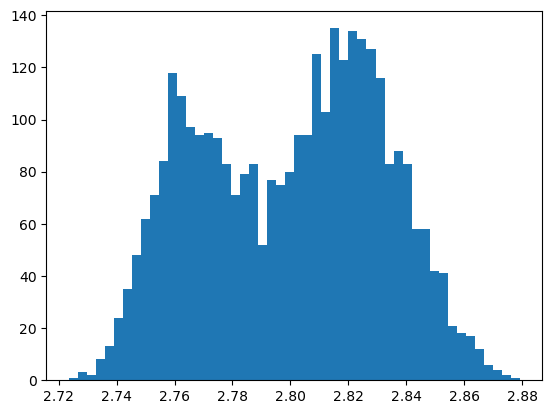

In [40]:
plt.hist(df['angleDif'],bins=50);

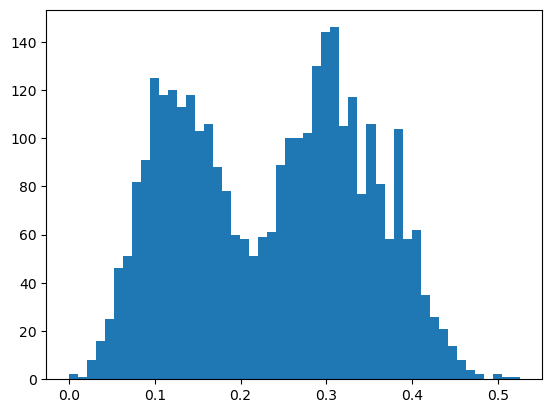

In [37]:
plt.hist(df['angle'], bins=50);

#### Proof of concept

In [81]:
plt.ioff();

In [7]:
filepath_ARL_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_ARL_Orth_1_1345.csv'
ds_ARL_1_1345 = SwitchSet(filepath_ARL_1_1345,set_range=(0.,0.99), skip_default_signal_baseline=600)

Time range: min=600.017, max=43816.497


Determining change point ranges automatically...
Using change_point_range_1=(600.017, 700.017)
Using change_point_range_2=(3600.017, 3700.017)
=== performing change point detection ===
cp range: (600.017, 700.017)
using 6437 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6437,)
computing range... ---> range = (0.88,0.93)
displaying jump_fig for switch parameter = s1



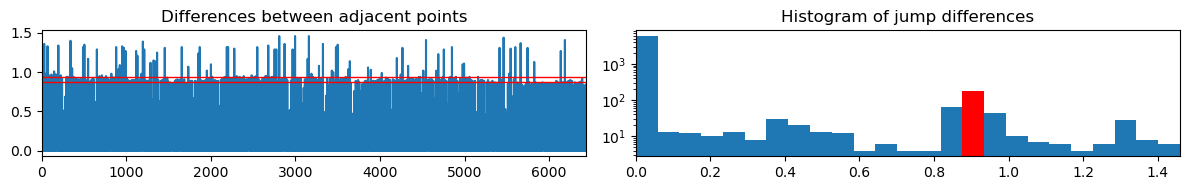



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6437,)
computing range... ---> range = (0.11,0.17)
displaying jump_fig for switch parameter = s2



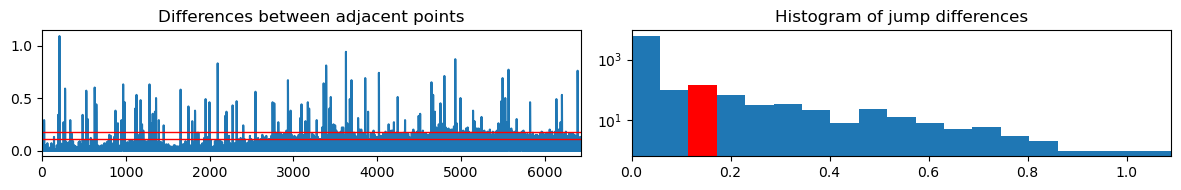



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6437,)
computing range... ---> range = (1.71,1.77)
displaying jump_fig for switch parameter = s3



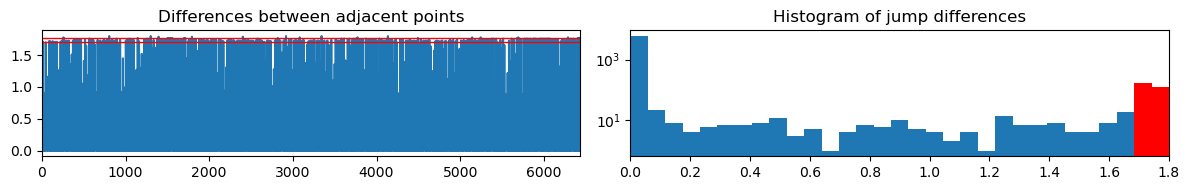



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.88,0.93)
Jump points detected: 183
out of total: ~400.0

computing offset...


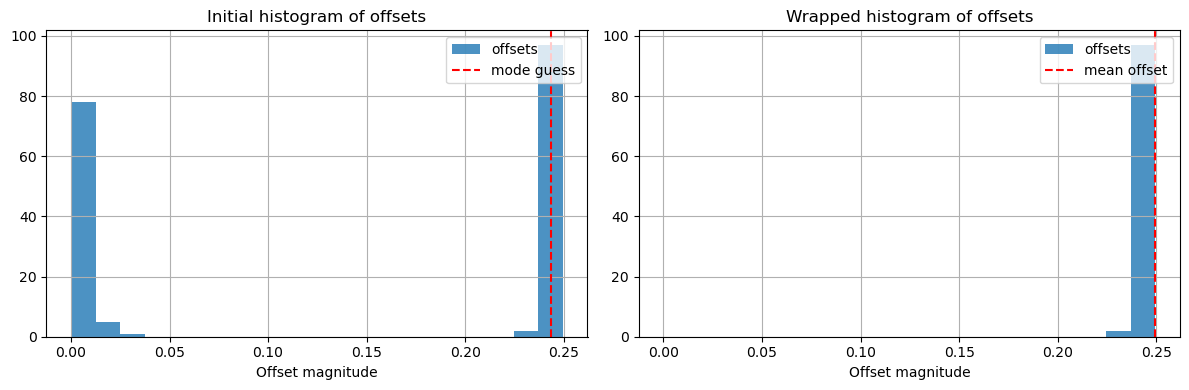



offset = 0.249 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (3600.017, 3700.017)
using 6737 data entries
skipping 201553 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6737,)
computing range... ---> range = (0.32,0.38)
displaying jump_fig for switch parameter = s1



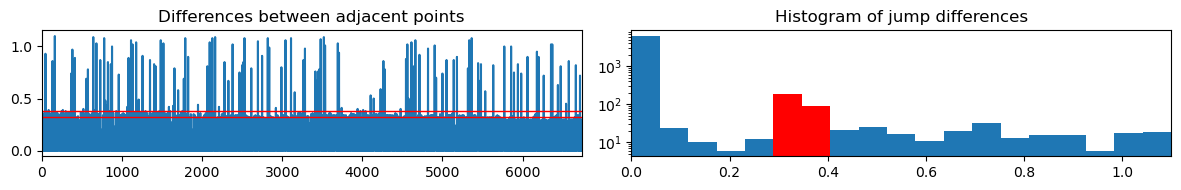



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6737,)
computing range... ---> range = (0.06,0.12)
displaying jump_fig for switch parameter = s2



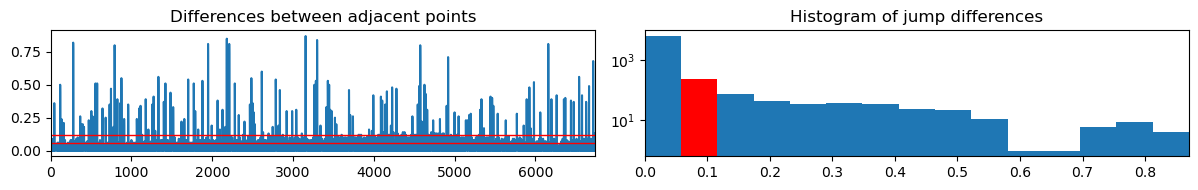



found width of 0.058 for s2
greater than prev width of 0.058 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6737,)
computing range... ---> range = (1.89,1.95)
displaying jump_fig for switch parameter = s3



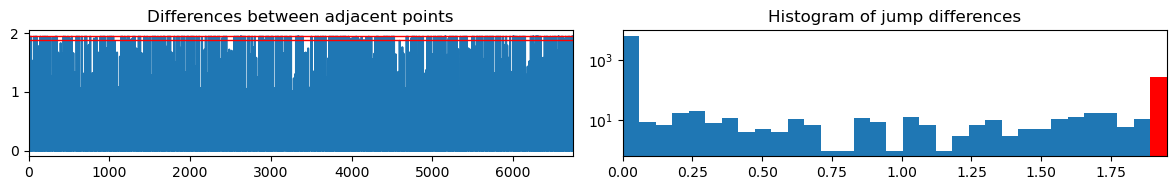



found width of 0.059 for s3
greater than prev width of 0.058 for s2
--- end of switch param: s3 ---

---> switch parameter found: s3 <---
finding differences within range = (1.89,1.95)
Jump points detected: 267
out of total: ~400.0

computing offset...


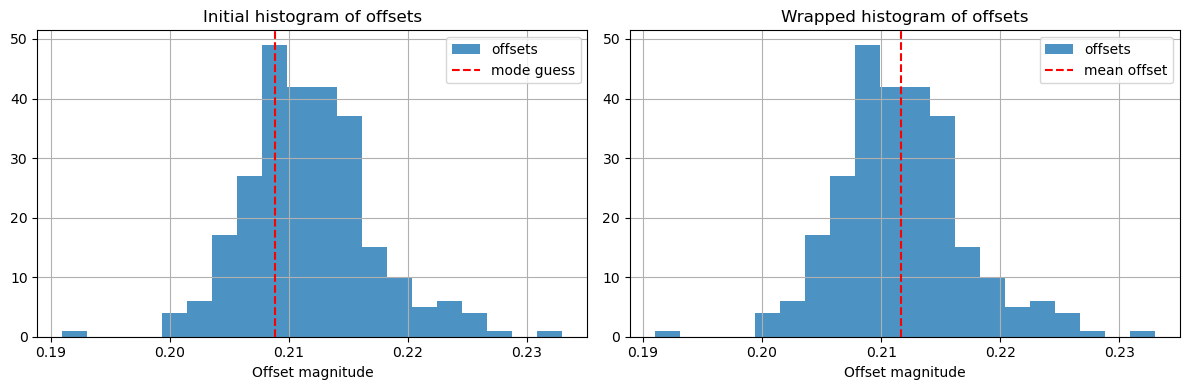



offset = 0.212 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.038 seconds over 12000.0 switches
Corrected Switch Time = 0.2499968
=== starting average_data ===
averaging data... Done
Dropped 233 observations with <4 points (out of total 171866 observations)

--- interpolating data ---
length before: 85827
length after: 86433
606 total added
--- end interpolating data ---

--- interpolating data ---
length before: 85806
length after: 86433
627 total added
--- end interpolating data ---
Signal 1 size=86433	Signal 1 range: t=(600.38,43815.83)
Signal 2 size=86433	Signal 2 range: t=(600.63,43816.08)
=== end average_data ===


In [8]:
ds_ARL_1_1345.find_switches(nominal_switch_rate=2, print_process=True)
ds_ARL_1_1345.average_data(print_process=True)

In [156]:
ds_ARL_1_1345.calc_similarity(input_stokes='first')

In [157]:
ds_ARL_1_1345.calc_stokes_ptf(input_stokes='first')

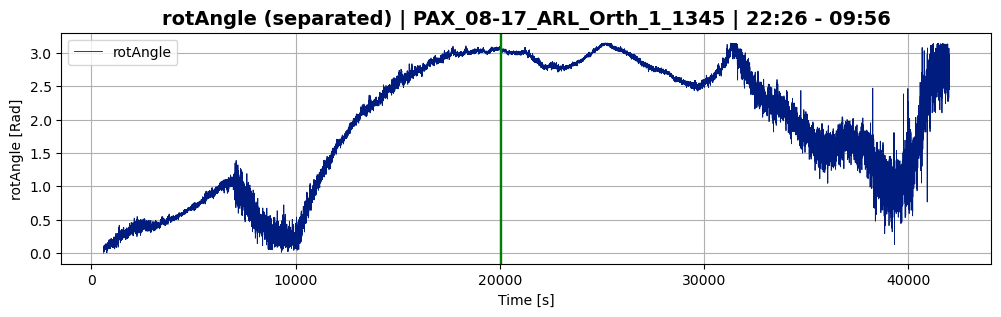

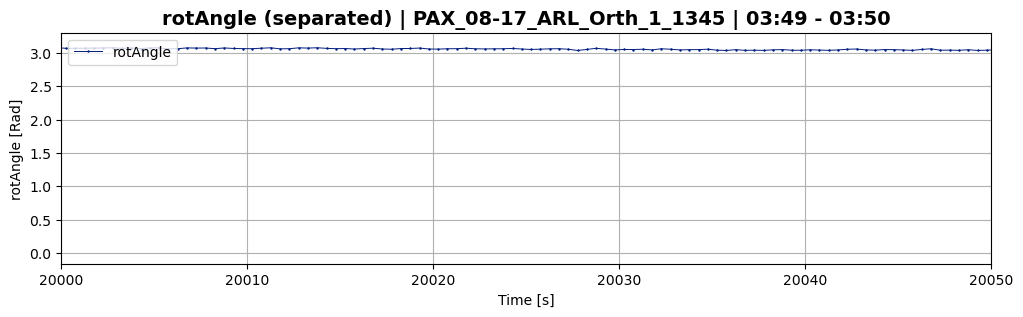

In [158]:
ds_ARL_1_1345.plot_separated(plot_param='rotAngle',sample_range=(20000,20050))

### Input SOPs as reference for entire dataset with IOPair

#### (OLD) 8-17 Manual ARL Channel Comparison

##### Get it working for 1345

###### Match input to output

In [61]:
plt.ioff();

Time range: min=0.07, max=95.271


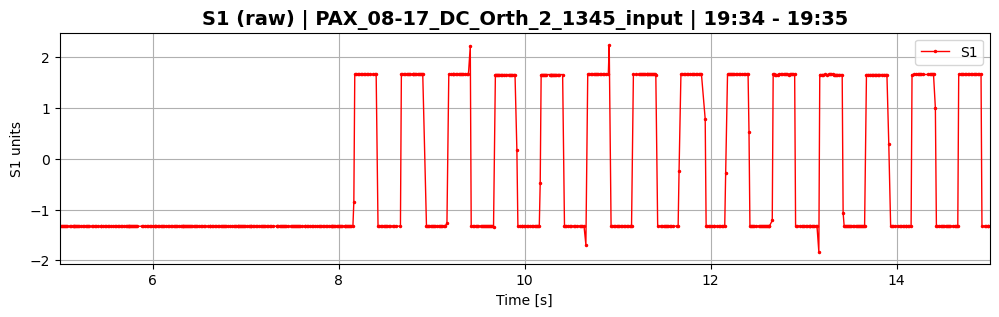

In [62]:
filepath_DC_2_1345_input='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345_input.csv'
ds_DC_2_1345_input = Dataset(filepath_DC_2_1345_input,skip_default_signal_baseline=False)
ds_DC_2_1345_input.plot_raw(plot_param='S1', birds_eye=False, sample_range=(5,15))

In [63]:
filepath_DC_2_1345_input='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345_input.csv'
ds_DC_2_1345_input = SwitchSet(filepath_DC_2_1345_input,skip_default_signal_baseline=10)
ds_DC_2_1345_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_DC_2_1345_input.average_data(print_process=False)
stokes_1_DC_2_1345_input, stokes_2_DC_2_1345_input = ds_DC_2_1345_input.average_stokes()
print('signal 1: ', stokes_1_DC_2_1345_input)   # Default signal!!
print('signal 2: ', stokes_2_DC_2_1345_input)

Time range: min=10.006, max=95.271
signal 1:  [-1.3262629134169046, -0.06001371229097209, 1.2598613051941363]
signal 2:  [1.6632221814995378, 0.2235836731351606, -0.8304236827765462]


In [64]:
filepath_DC_2_1345='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345.csv'
ds_DC_2_1345 = Dataset(filepath_DC_2_1345,set_range=(0,0.05),skip_default_signal_baseline=False)

Time range: min=0.053, max=1407.036


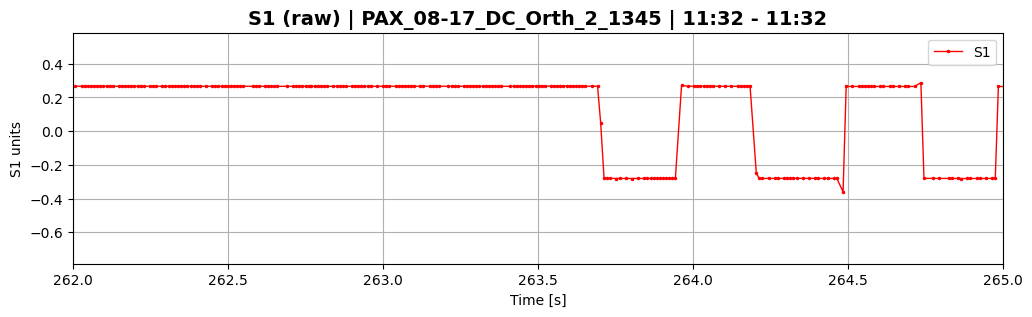

In [65]:
ds_DC_2_1345.plot_raw(plot_param='S1', birds_eye=False, sample_range=(262,265))

In [66]:
filepath_DC_2_1345='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345.csv'
ds_DC_2_1345 = SwitchSet(filepath_DC_2_1345,set_range=(0,0.05),skip_default_signal_baseline=300)
ds_DC_2_1345.find_switches(nominal_switch_rate=2, print_process=False)
ds_DC_2_1345.average_data(print_process=False)
stokes_1_temp, stokes_2_temp = ds_DC_2_1345.average_stokes()
print('signal 1: ', stokes_1_temp)
print('signal 2: ', stokes_2_temp)   # Default signal!!

Time range: min=300.014, max=1407.036
signal 1:  [-0.3224826018745242, 1.3225520803438613, 0.09368305668902584]
signal 2:  [0.3146248896856022, -1.2705318833783006, 0.09798487645068539]


In [93]:
### Switch inputs: True
# This message will mean we need to use "switch_inputs=True" in calc_stokes_ptf(), so the correct inputs
# Get matched to the correct outputs

###### Plug input into ptf calc

In [115]:
filepath_DC_2_1345='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345.csv'
ds_DC_2_1345 = SwitchSet(filepath_DC_2_1345,set_range=(0,0.95),skip_default_signal_baseline=300)

Time range: min=300.014, max=26798.304


Determining change point ranges automatically...
Using change_point_range_1=(300.014, 400.014)
Using change_point_range_2=(3300.014, 3400.014)
=== performing change point detection ===
cp range: (300.014, 400.014)
using 6729 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6729,)
computing range... ---> range = (0.39,0.45)
displaying jump_fig for switch parameter = s1



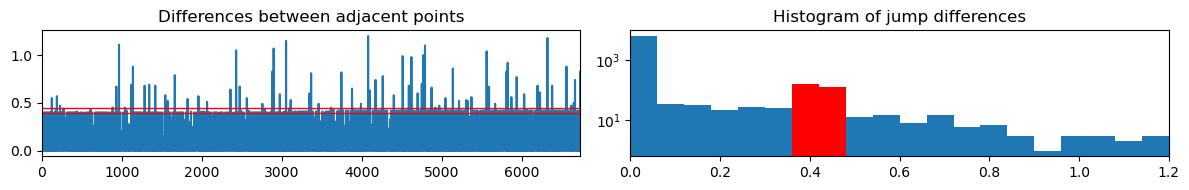



found width of 0.060 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6729,)
computing range... ---> range = (1.93,1.99)
displaying jump_fig for switch parameter = s2



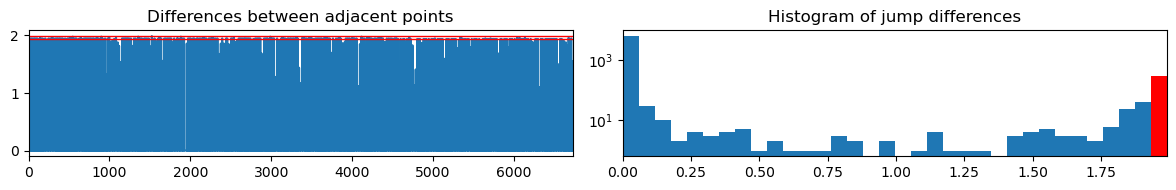



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6729,)
computing range... ---> range = (0.06,0.11)
displaying jump_fig for switch parameter = s3



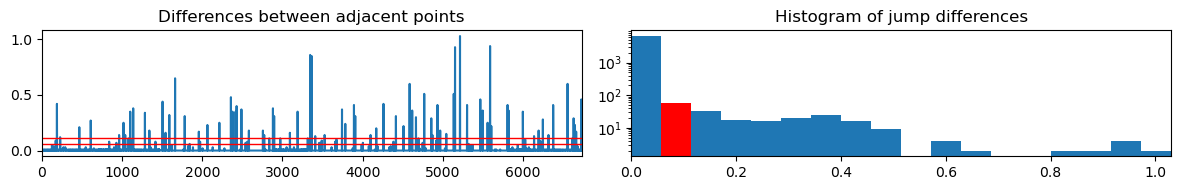



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.39,0.45)
Jump points detected: 279
out of total: ~400.0

computing offset...


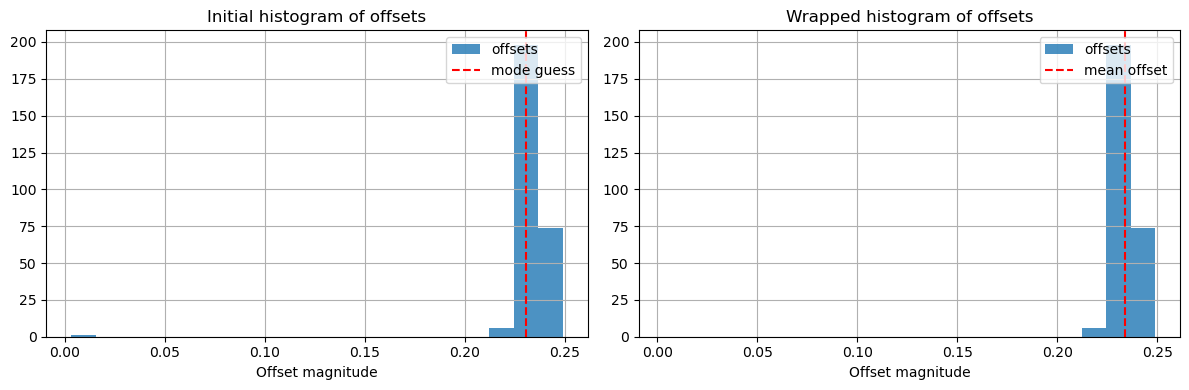



offset = 0.234 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (3300.014, 3400.014)
using 7081 data entries
skipping 210210 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7081,)
computing range... ---> range = (0.47,0.53)
displaying jump_fig for switch parameter = s1



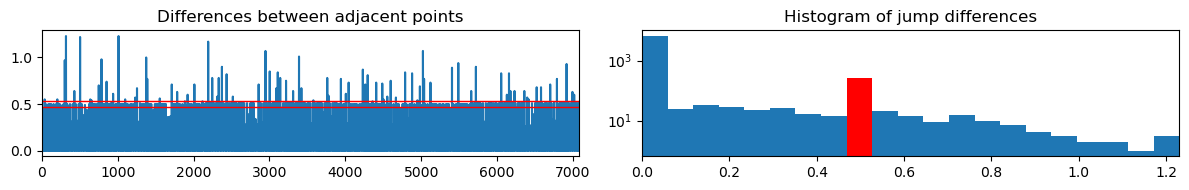



found width of 0.059 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7081,)
computing range... ---> range = (1.92,1.98)
displaying jump_fig for switch parameter = s2



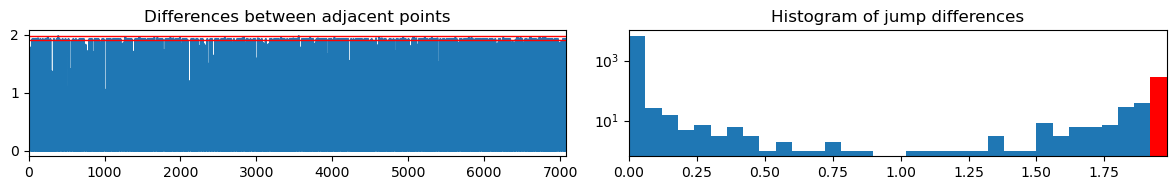



found width of 0.060 for s2
greater than prev width of 0.059 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7081,)
computing range... ---> range = (0.12,0.18)
displaying jump_fig for switch parameter = s3



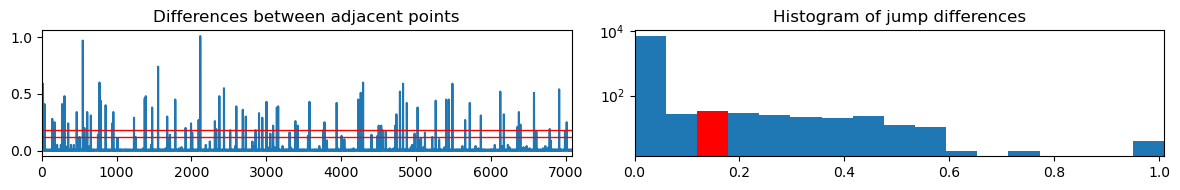



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (1.92,1.98)
Jump points detected: 291
out of total: ~399.9

computing offset...


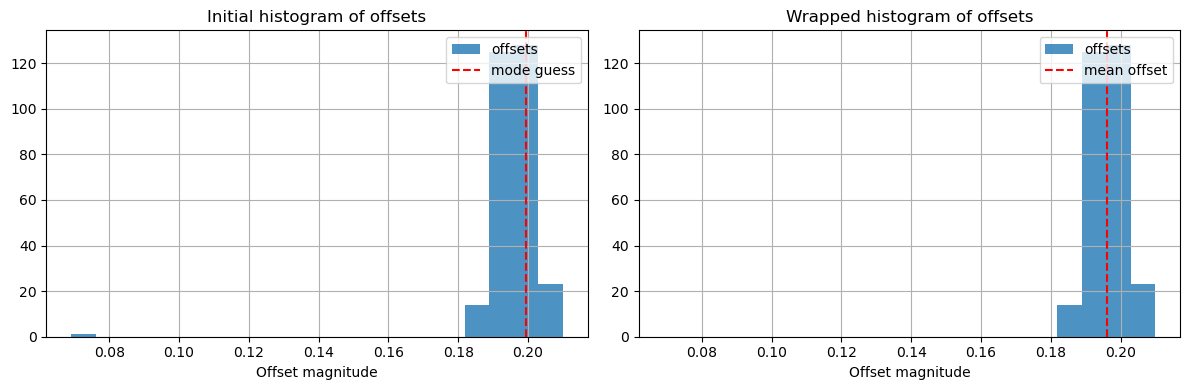



offset = 0.196 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.038 seconds over 12000.0 switches
Corrected Switch Time = 0.2499968
=== starting average_data ===
averaging data... Done
Dropped 87 observations with <4 points (out of total 105604 observations)

--- interpolating data ---
length before: 52760
length after: 52997
237 total added
--- end interpolating data ---

--- interpolating data ---
length before: 52757
length after: 52996
239 total added
--- end interpolating data ---
Signal 1 size=52997	Signal 1 range: t=(300.36,26798.03)
Signal 2 size=52996	Signal 2 range: t=(300.61,26797.78)
=== end average_data ===


In [116]:
ds_DC_2_1345.find_switches(nominal_switch_rate=2, print_process=True)
ds_DC_2_1345.average_data(print_process=True)

In [117]:
filepath_DC_2_1345_input='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345_input.csv'
ds_DC_2_1345_input = SwitchSet(filepath_DC_2_1345_input,skip_default_signal_baseline=10)
ds_DC_2_1345_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_DC_2_1345_input.average_data(print_process=False)

Time range: min=10.006, max=95.271


In [118]:
ds_DC_2_1345.calc_stokes_ptf(input_stokes=(ds_DC_2_1345_input.average_stokes()), switch_inputs=True)

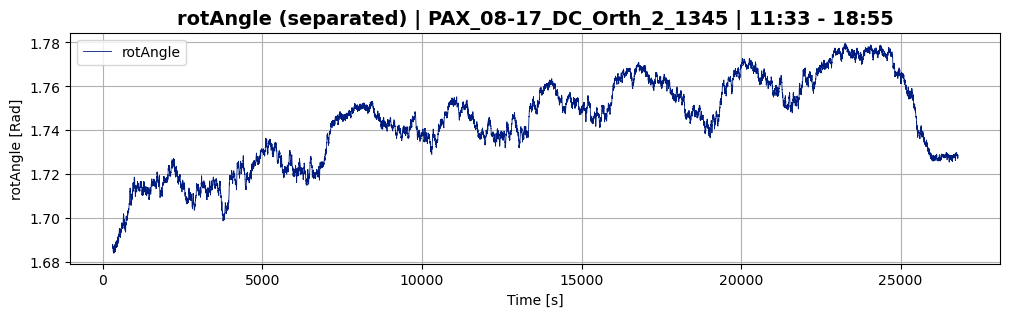

In [119]:
ds_DC_2_1345.plot_separated(plot_param='rotAngle')

Number of taus used for signal: 2322


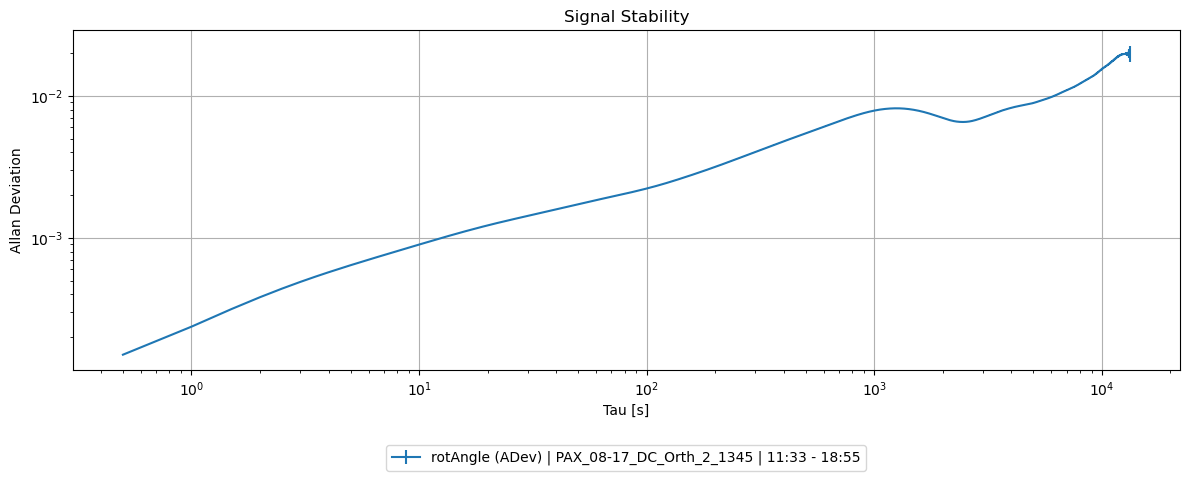

In [138]:
ds_DC_2_1345.adev(plot_param='rotAngle', plot_adev=True);

###### Testing

In [67]:
filepath_DC_2_1345='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1345.csv'
ds_DC_2_1345 = SwitchSet(filepath_DC_2_1345,set_range=(0,0.3),skip_default_signal_baseline=300)

Time range: min=300.014, max=8440.566


Determining change point ranges automatically...
Using change_point_range_1=(300.014, 400.014)
Using change_point_range_2=(3300.014, 3400.014)
=== performing change point detection ===
cp range: (300.014, 400.014)
using 6729 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6729,)
computing range... ---> range = (0.39,0.45)
displaying jump_fig for switch parameter = s1



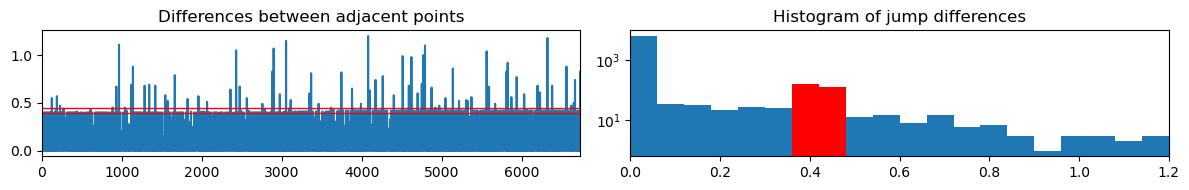



found width of 0.060 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6729,)
computing range... ---> range = (1.93,1.99)
displaying jump_fig for switch parameter = s2



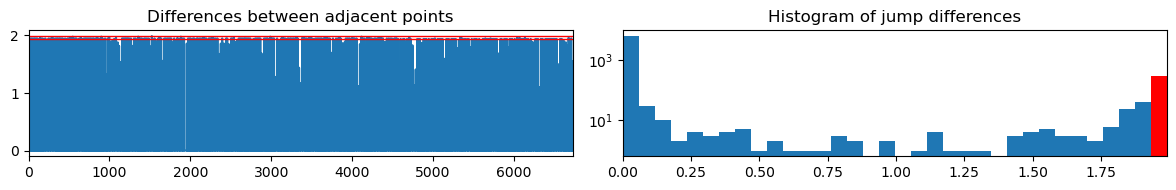



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6729,)
computing range... ---> range = (0.06,0.11)
displaying jump_fig for switch parameter = s3



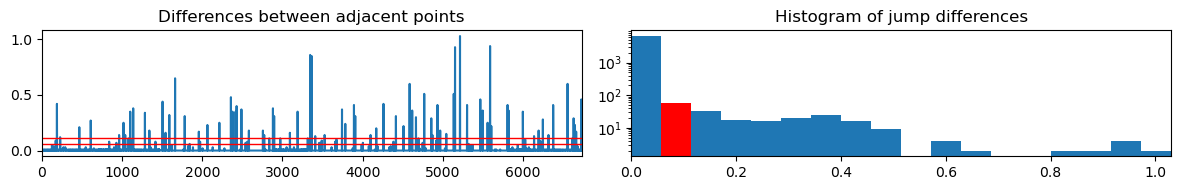



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.39,0.45)
Jump points detected: 279
out of total: ~400.0

computing offset...


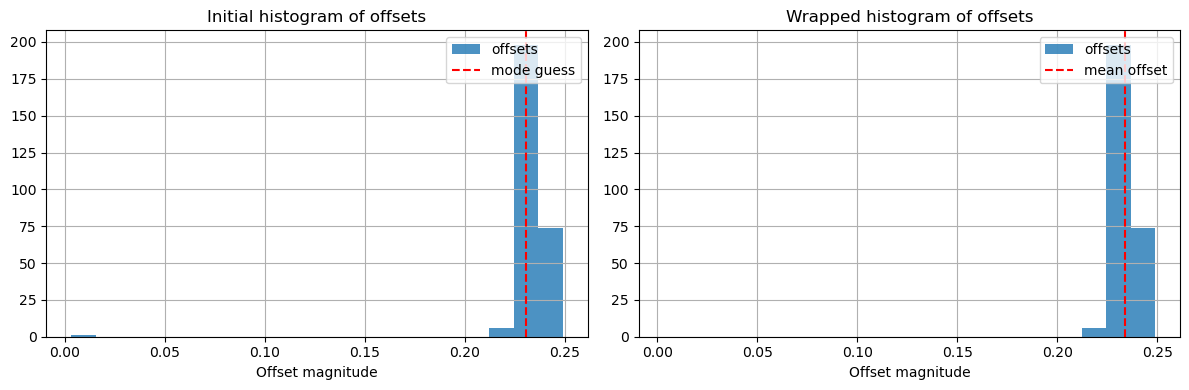



offset = 0.234 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (3300.014, 3400.014)
using 7081 data entries
skipping 210210 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7081,)
computing range... ---> range = (0.47,0.53)
displaying jump_fig for switch parameter = s1



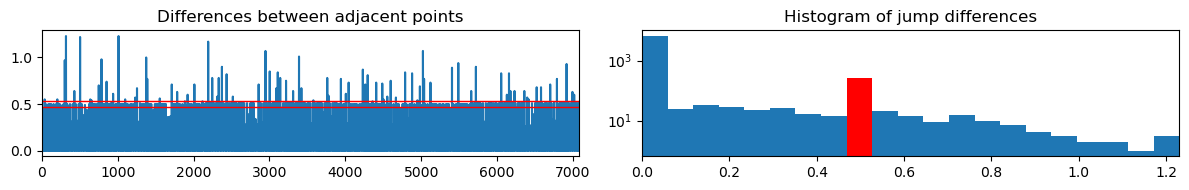



found width of 0.059 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7081,)
computing range... ---> range = (1.92,1.98)
displaying jump_fig for switch parameter = s2



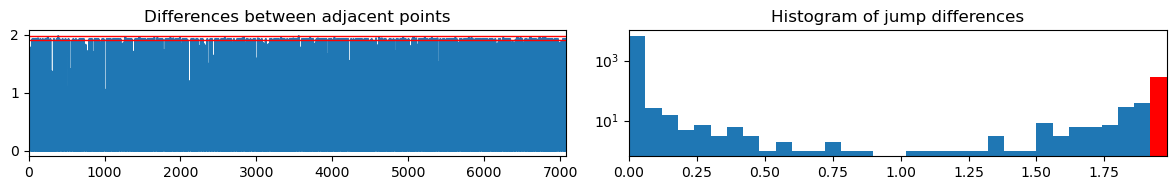



found width of 0.060 for s2
greater than prev width of 0.059 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7081,)
computing range... ---> range = (0.12,0.18)
displaying jump_fig for switch parameter = s3



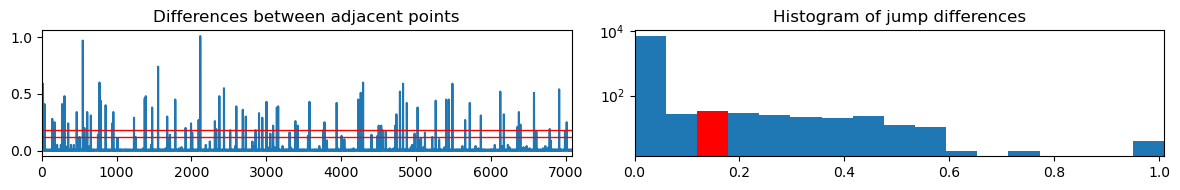



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (1.92,1.98)
Jump points detected: 291
out of total: ~399.9

computing offset...


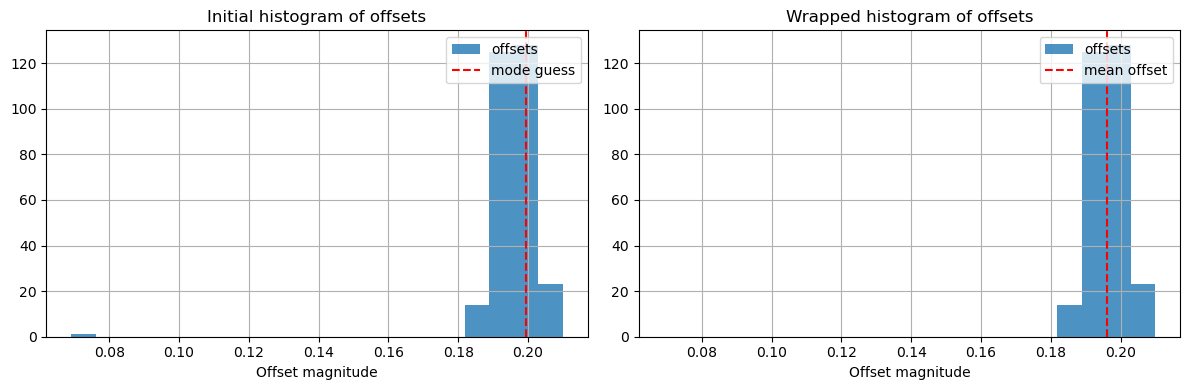



offset = 0.196 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.038 seconds over 12000.0 switches
Corrected Switch Time = 0.2499968
=== starting average_data ===
averaging data... Done
Dropped 26 observations with <4 points (out of total 32464 observations)

--- interpolating data ---
length before: 16222
length after: 16281
59 total added
--- end interpolating data ---

--- interpolating data ---
length before: 16216
length after: 16280
64 total added
--- end interpolating data ---
Signal 1 size=16281	Signal 1 range: t=(300.36,8440.26)
Signal 2 size=16280	Signal 2 range: t=(300.61,8440.01)
=== end average_data ===


In [68]:
ds_DC_2_1345.find_switches(nominal_switch_rate=2, print_process=True)
ds_DC_2_1345.average_data(print_process=True)

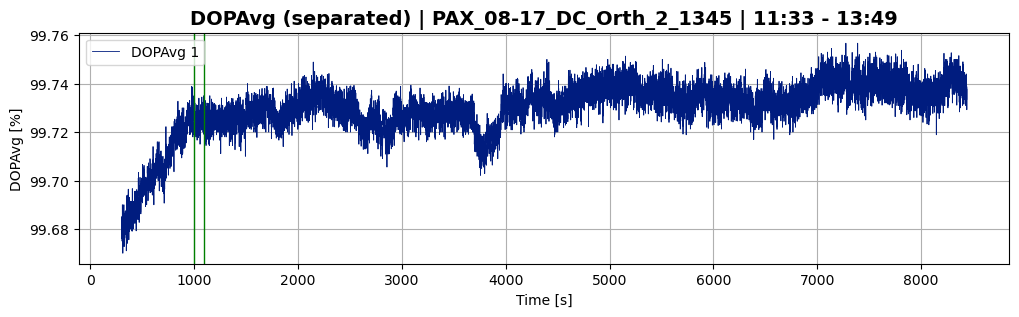

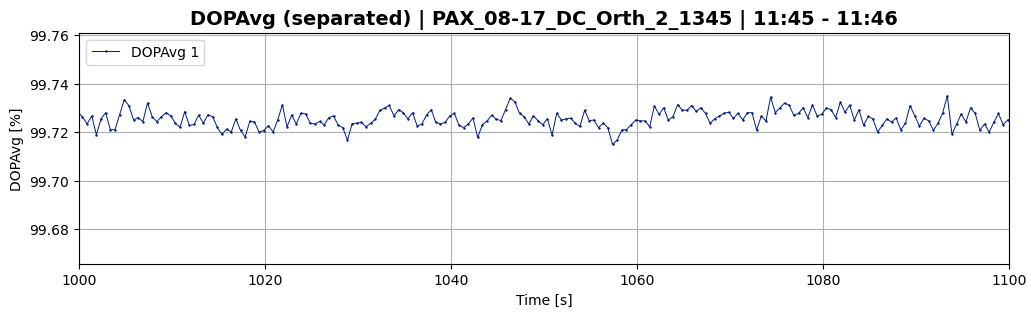

In [77]:
ds_DC_2_1345.plot_separated(plot_param='DOPAvg', plot_signal=1,sample_range=(1000,1100))

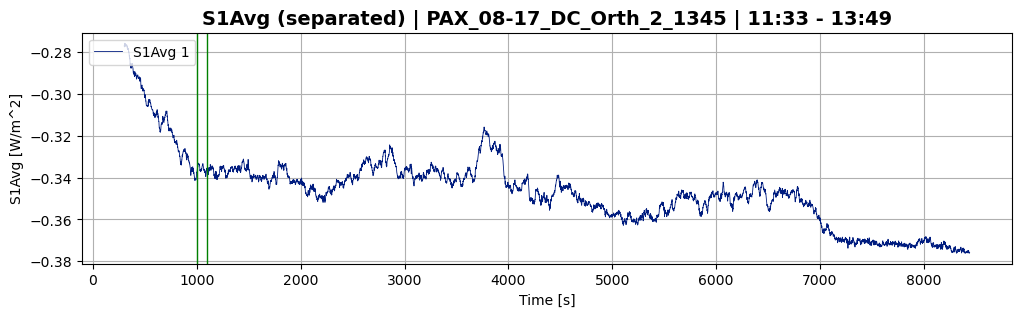

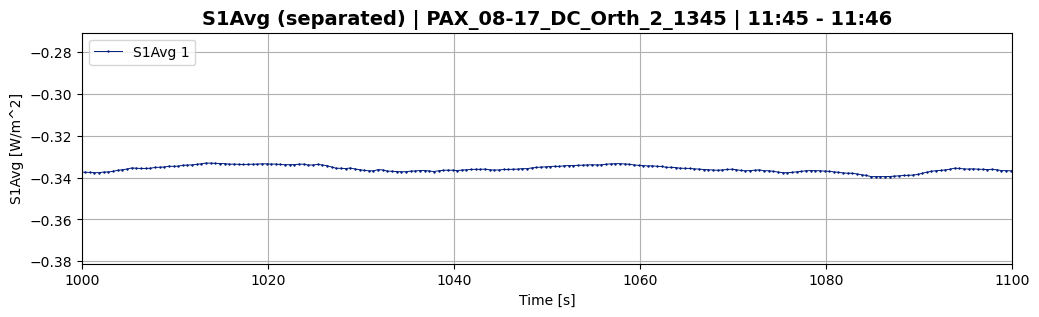

In [78]:
ds_DC_2_1345.plot_separated(plot_param='S1Avg', plot_signal=1,sample_range=(1000,1100))

##### Do same thing for 1560

###### Match input to output

In [61]:
plt.ioff();

Time range: min=0.051, max=120.36


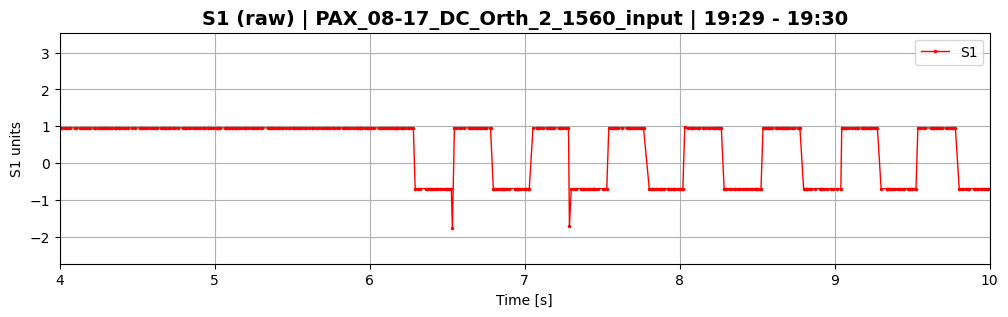

In [122]:
filepath_DC_2_1560_input='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1560_input.csv'
ds_DC_2_1560_input = Dataset(filepath_DC_2_1560_input,skip_default_signal_baseline=False)
ds_DC_2_1560_input.plot_raw(plot_param='S1', birds_eye=False, sample_range=(4,10))

In [125]:
filepath_DC_2_1560_input='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1560_input.csv'
ds_DC_2_1560_input = SwitchSet(filepath_DC_2_1560_input,skip_default_signal_baseline=10)
ds_DC_2_1560_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_DC_2_1560_input.average_data(print_process=False)
stokes_1_DC_2_1560_input, stokes_2_DC_2_1560_input = ds_DC_2_1560_input.average_stokes()
print('signal 1: ', stokes_1_DC_2_1560_input)
print('signal 2: ', stokes_2_DC_2_1560_input)   # Default signal!!

Time range: min=10.007, max=120.36
signal 1:  [-0.687088334220518, -0.22568054106304528, 2.1038238736263737]
signal 2:  [0.9582882856497966, -0.11703437570517346, -2.043392762583687]


In [126]:
filepath_DC_2_1560='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1560.csv'
ds_DC_2_1560 = Dataset(filepath_DC_2_1560,set_range=(0,0.05),skip_default_signal_baseline=False)

Time range: min=0.05, max=1398.458


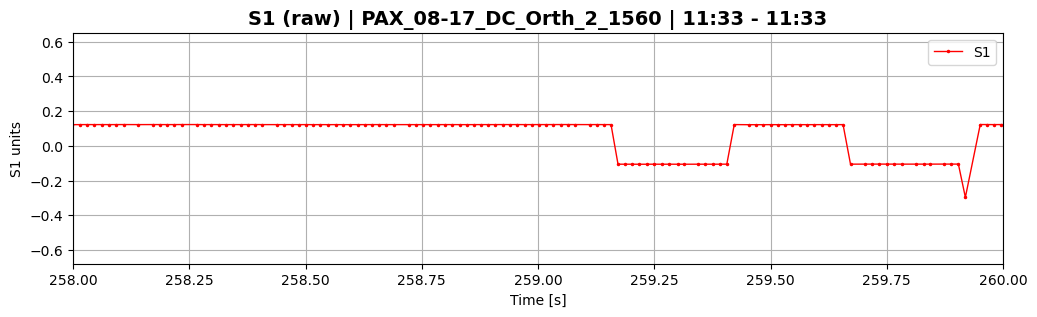

In [129]:
ds_DC_2_1560.plot_raw(plot_param='S1', birds_eye=False, sample_range=(258,260))

In [130]:
filepath_DC_2_1560='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1560.csv'
ds_DC_2_1560 = SwitchSet(filepath_DC_2_1560,set_range=(0,0.05),skip_default_signal_baseline=300)
ds_DC_2_1560.find_switches(nominal_switch_rate=2, print_process=False)
ds_DC_2_1560.average_data(print_process=False)
stokes_1_temp, stokes_2_temp = ds_DC_2_1560.average_stokes()
print('signal 1: ', stokes_1_temp)
print('signal 2: ', stokes_2_temp)   # Default signal!!

Time range: min=300.014, max=1398.458
signal 1:  [-0.10669371026597278, 1.4399089654145574, -0.2997517049868968]
signal 2:  [0.11861029993918523, -1.4829627977674864, 0.0048293431279236975]


In [93]:
### Switch inputs: False
# This message will mean we need to use "switch_inputs=True" in calc_stokes_ptf(), so the correct inputs
# Get matched to the correct outputs

###### Plug input into ptf calc

In [131]:
filepath_DC_2_1560='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1560.csv'
ds_DC_2_1560 = SwitchSet(filepath_DC_2_1560,set_range=(0,0.95),skip_default_signal_baseline=300)

Time range: min=300.014, max=26797.646


Determining change point ranges automatically...
Using change_point_range_1=(300.014, 400.014)
Using change_point_range_2=(3300.014, 3400.014)
=== performing change point detection ===
cp range: (300.014, 400.014)
using 5618 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (5618,)
computing range... ---> range = (0.12,0.18)
displaying jump_fig for switch parameter = s1



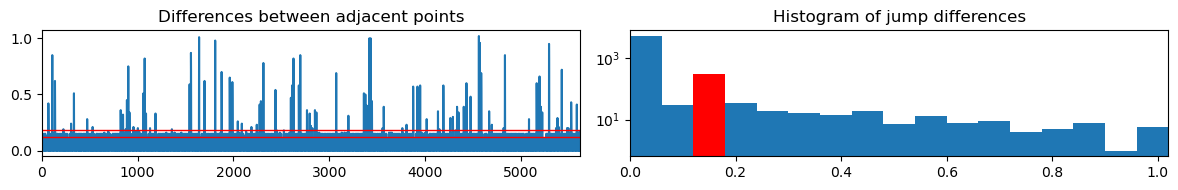



found width of 0.060 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (5618,)
computing range... ---> range = (1.94,2.00)
displaying jump_fig for switch parameter = s2



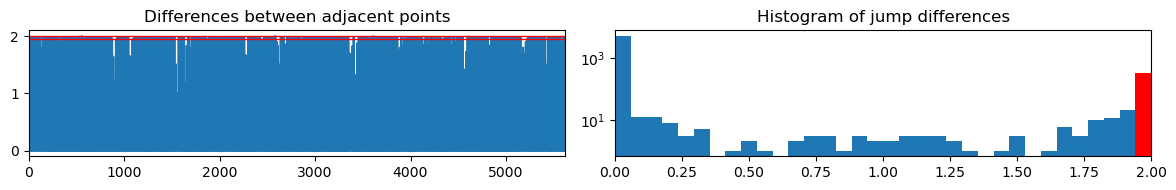



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (5618,)
computing range... ---> range = (0.11,0.17)
displaying jump_fig for switch parameter = s3



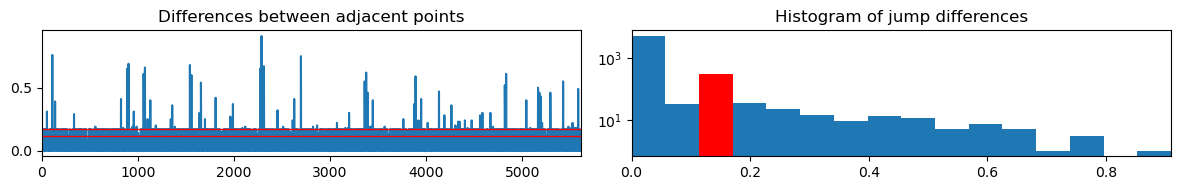



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.12,0.18)
Jump points detected: 301
out of total: ~400.0

computing offset...


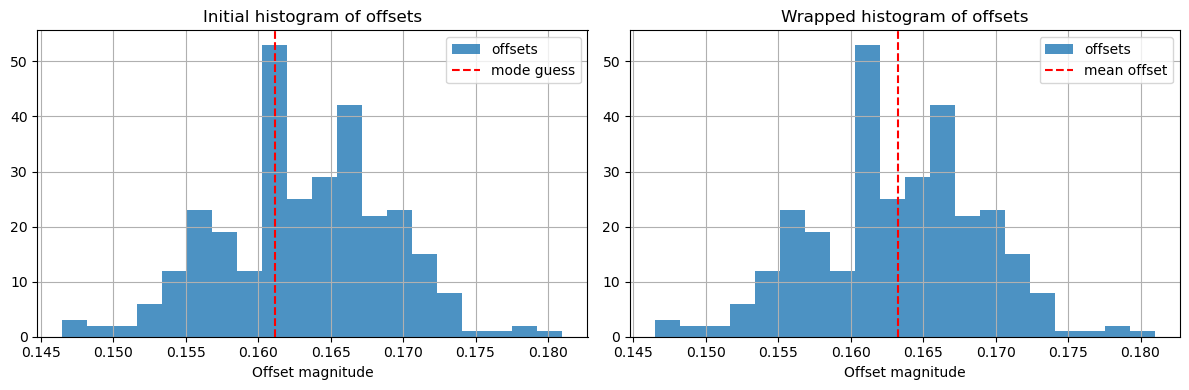



offset = 0.163 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (3300.014, 3400.014)
using 5526 data entries
skipping 166024 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (5526,)
computing range... ---> range = (0.12,0.18)
displaying jump_fig for switch parameter = s1



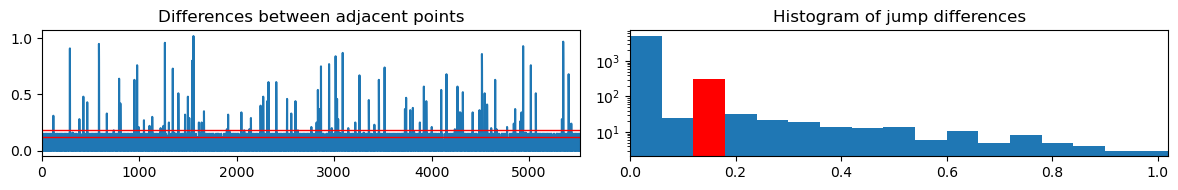



found width of 0.060 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (5526,)
computing range... ---> range = (1.94,2.00)
displaying jump_fig for switch parameter = s2



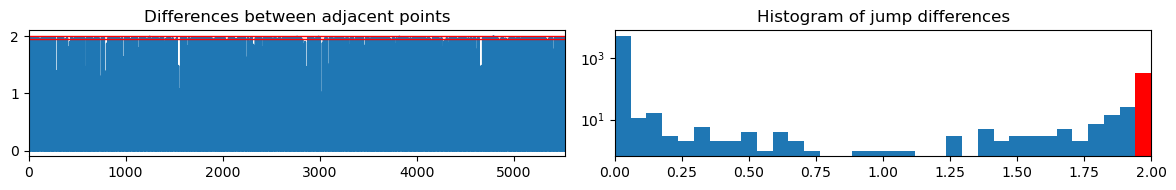



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (5526,)
computing range... ---> range = (0.18,0.24)
displaying jump_fig for switch parameter = s3



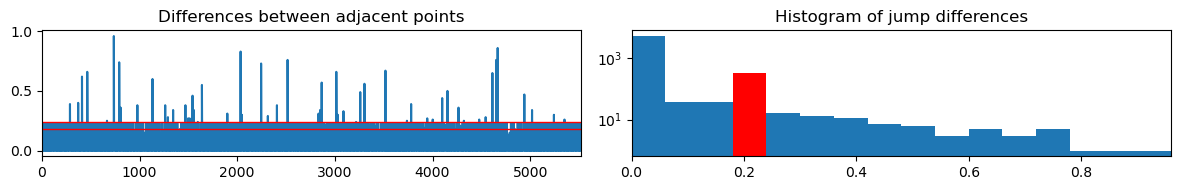



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.12,0.18)
Jump points detected: 312
out of total: ~399.9

computing offset...


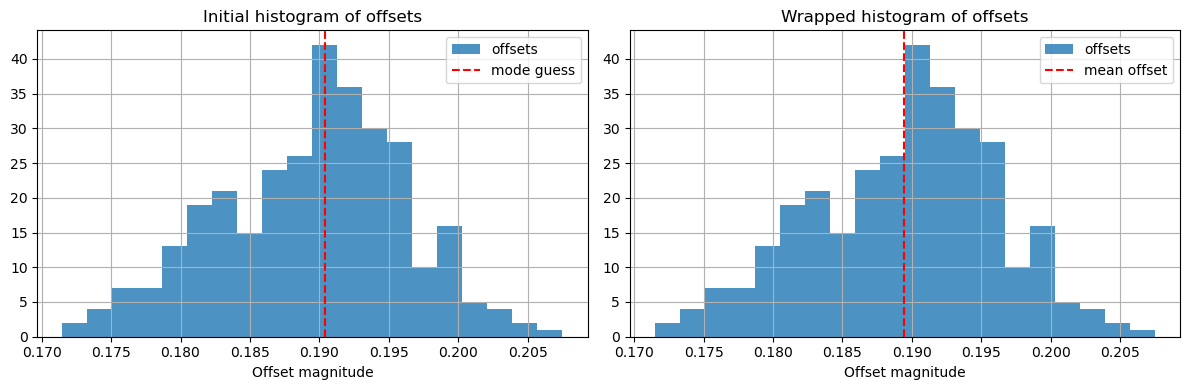



offset = 0.189 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of 0.026 seconds over 12000.0 switches
Corrected Switch Time = 0.2500022
=== starting average_data ===
averaging data... Done
Dropped 12 observations with <4 points (out of total 105988 observations)

--- interpolating data ---
length before: 52988
length after: 52994
6 total added
--- end interpolating data ---

--- interpolating data ---
length before: 52988
length after: 52994
6 total added
--- end interpolating data ---
Signal 1 size=52994	Signal 1 range: t=(300.54,26797.27)
Signal 2 size=52994	Signal 2 range: t=(300.29,26797.02)
=== end average_data ===


In [132]:
ds_DC_2_1560.find_switches(nominal_switch_rate=2, print_process=True)
ds_DC_2_1560.average_data(print_process=True)

In [133]:
# Plug in from above section!
filepath_DC_2_1560_input='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_2_1560_input.csv'
ds_DC_2_1560_input = SwitchSet(filepath_DC_2_1560_input,skip_default_signal_baseline=10)
ds_DC_2_1560_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_DC_2_1560_input.average_data(print_process=False)

Time range: min=10.007, max=120.36


In [135]:
ds_DC_2_1560.calc_stokes_ptf(input_stokes=(ds_DC_2_1560_input.average_stokes()), switch_inputs=False)

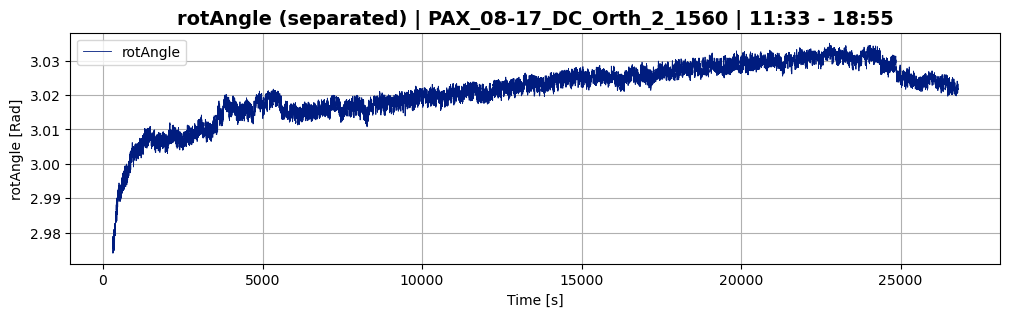

In [136]:
ds_DC_2_1560.plot_separated(plot_param='rotAngle')

Number of taus used for signal: 2322


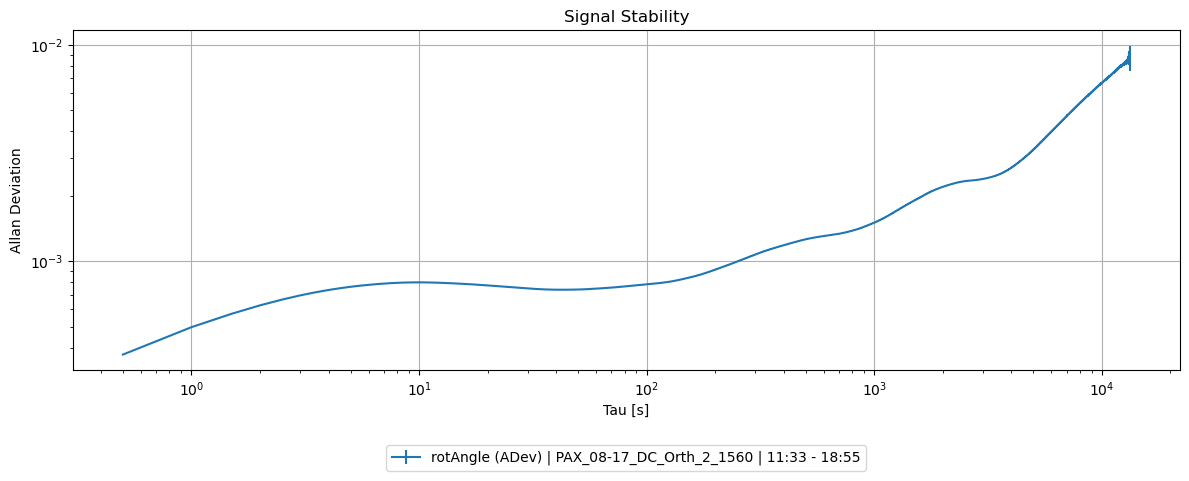

In [137]:
ds_DC_2_1560.adev(plot_param='rotAngle', plot_adev=True);

##### Results from both 1345 and 1560

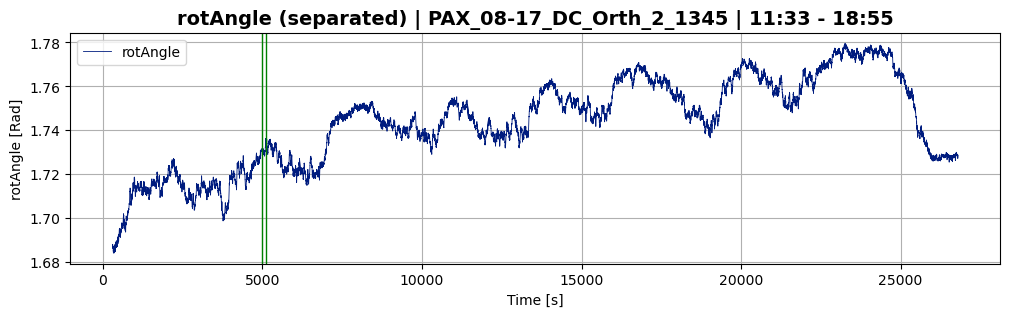

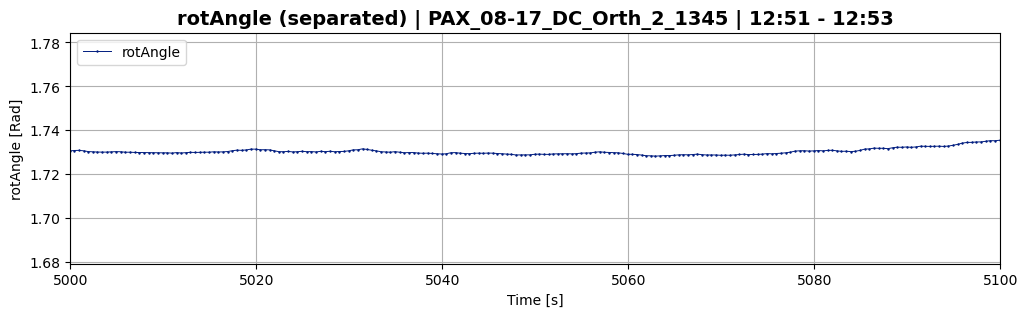

In [139]:
ds_DC_2_1345.plot_separated(plot_param='rotAngle',sample_range=(5000,5100))

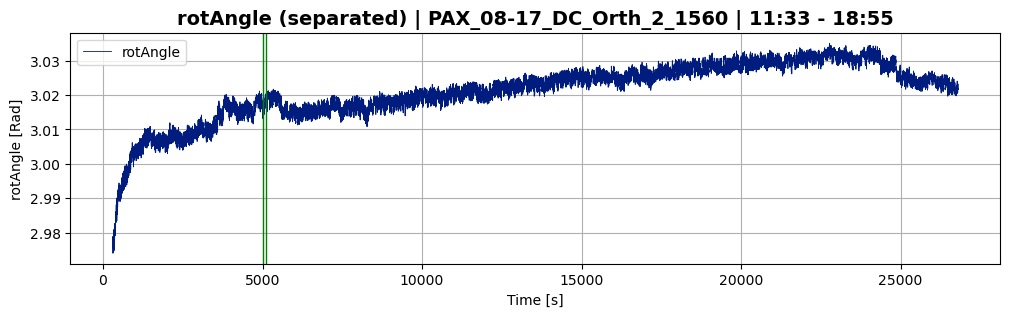

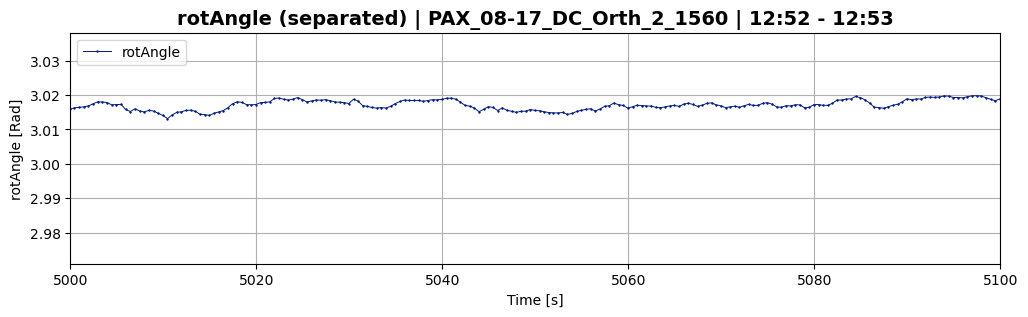

In [140]:
ds_DC_2_1560.plot_separated(plot_param='rotAngle',sample_range=(5000,5100))

Number of taus used for signal: 2322


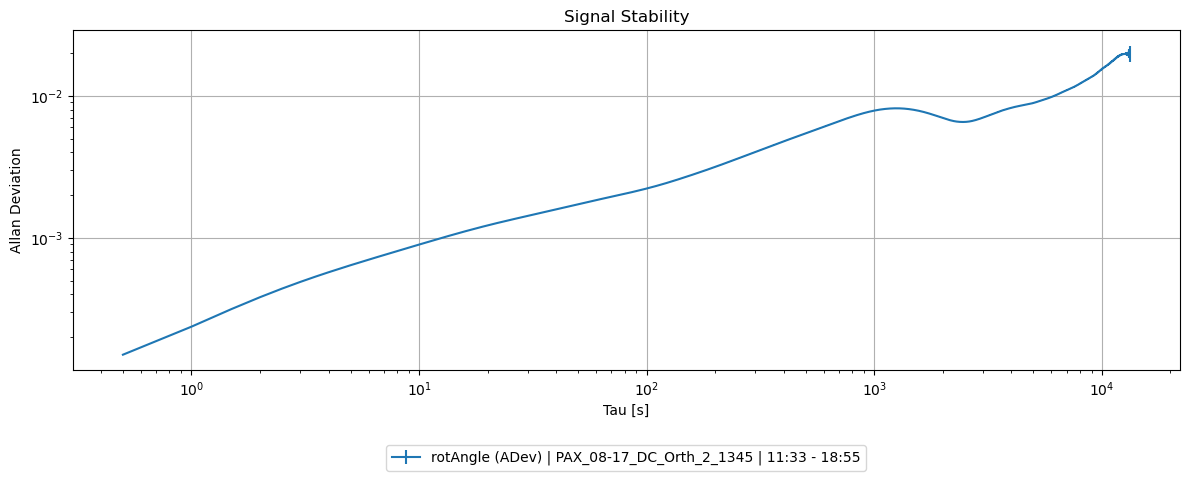

In [138]:
ds_DC_2_1345.adev(plot_param='rotAngle', plot_adev=True);

Number of taus used for signal: 2322


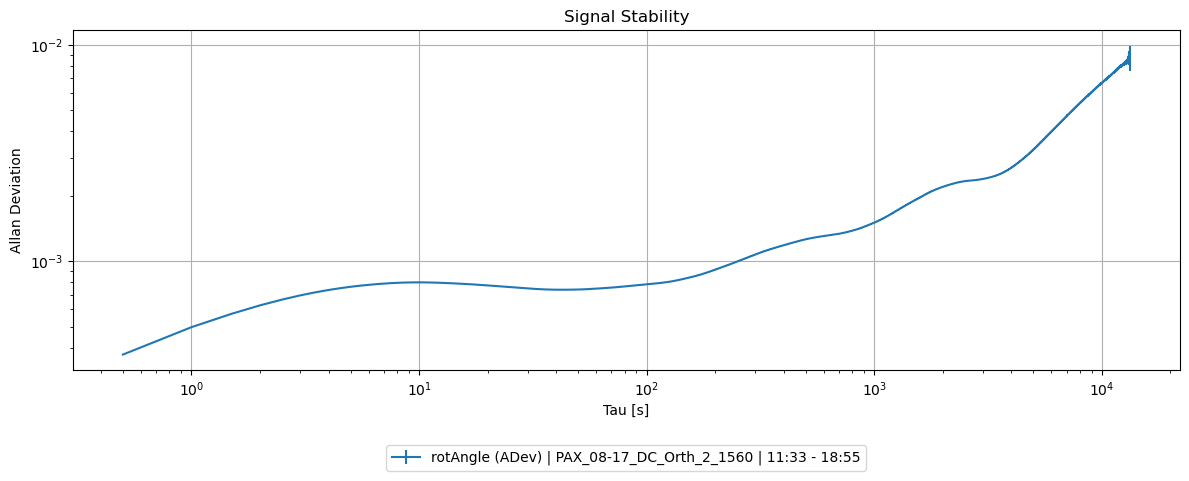

In [137]:
ds_DC_2_1560.adev(plot_param='rotAngle', plot_adev=True);

#### (OLD) 10-30 Manual ARL Channel Comparison

##### 1345

###### Match input to output

In [9]:
plt.ioff();

Time range: min=0.05, max=60.007


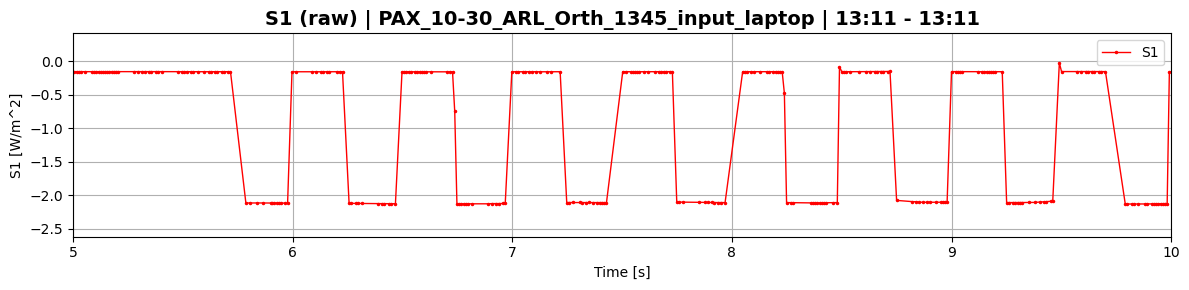

(None, <Figure size 1200x300 with 1 Axes>)

In [10]:
filepath_ARL_1345_input_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_input_laptop.csv'
ds_ARL_1345_input_1030 = Dataset(filepath_ARL_1345_input_1030,skip_default_signal_baseline=False)
ds_ARL_1345_input_1030.plot_raw(plot_param='S1', birds_eye=False, sample_range=(5,10))

In [11]:
filepath_ARL_1345_input_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_input_laptop.csv'
ds_ARL_1345_input_1030 = SwitchSet(filepath_ARL_1345_input_1030,skip_default_signal_baseline=8)
ds_ARL_1345_input_1030.find_switches(nominal_switch_rate=2, print_process=False)
ds_ARL_1345_input_1030.average_data(print_assignment=True)
# Default is signal 2

NameError: name 'SwitchSet' is not defined

In [ ]:
filepath_ARL_1345_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_desktop.csv'
ds_ARL_1345_1030 = Dataset(filepath_ARL_1345_1030,set_range=(0,0.0005),skip_default_signal_baseline=False)

In [ ]:
ds_ARL_1345_1030.plot_raw(plot_param='S3', birds_eye=False, sample_range=(5,10))

In [ ]:
filepath_ARL_1345_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_desktop.csv'
ds_ARL_1345_1030 = SwitchSet(filepath_ARL_1345_1030,set_range=(0,0.0005),skip_default_signal_baseline=8)
ds_ARL_1345_1030.find_switches(nominal_switch_rate=2, print_process=False)
t = ds_ARL_1345_1030.average_data(print_assignment=True)
# Default is signal 1

In [ ]:
### Switch inputs: True
# Meaning we need to use this value for the "switch_inputs" parameter in calc_stokes_ptf(), so the correct inputs
# Get matched to the correct outputs

###### Plug input into ptf calc

In [ ]:
filepath_ARL_1345_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_desktop.csv'
ds_ARL_1345_1030 = SwitchSet(filepath_ARL_1345_1030,set_range=(0,0.95),skip_default_signal_baseline=8)

In [ ]:
ds_ARL_1345_1030.find_switches(nominal_switch_rate=2, print_process=True)
ds_ARL_1345_1030.average_data(print_process=True)

In [ ]:
filepath_ARL_1345_1030_input='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_input_laptop.csv'
ds_ARL_1345_1030_input = SwitchSet(filepath_ARL_1345_1030_input,skip_default_signal_baseline=10)
ds_ARL_1345_1030_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_ARL_1345_1030_input.average_data(print_process=False)

In [ ]:
ds_ARL_1345_1030.calc_stokes_ptf(input_stokes=(ds_ARL_1345_1030_input.average_stokes()), switch_inputs=True)

In [ ]:
ds_ARL_1345_1030.plot_separated(plot_param='rotAngle',sample_range=(8000,8500))

##### 1560

###### Match input to output

In [ ]:
plt.ioff();

In [ ]:
filepath_ARL_1560_1030_input='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1560_input_laptop.csv'
ds_ARL_1560_1030_input = Dataset(filepath_ARL_1560_1030_input,skip_default_signal_baseline=False)
ds_ARL_1560_1030_input.plot_raw(plot_param='S1', birds_eye=False, sample_range=(4,10))

In [ ]:
filepath_ARL_1560_1030_input='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1560_input_laptop.csv'
ds_ARL_1560_1030_input = SwitchSet(filepath_ARL_1560_1030_input,skip_default_signal_baseline=10)
ds_ARL_1560_1030_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_ARL_1560_1030_input.average_data(print_process=False)
stokes_1_temp_input, stokes_2_temp_input = ds_ARL_1560_1030_input.average_stokes()
print('signal 1: ', stokes_1_temp_input)
print('signal 2: ', stokes_2_temp_input)   # Default signal!!

In [ ]:
filepath_ARL_1560_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1560_laptop.csv'
ds_ARL_1560_1030 = Dataset(filepath_ARL_1560_1030,set_range=(0,0.005),skip_default_signal_baseline=False)

In [ ]:
ds_ARL_1560_1030.plot_raw(plot_param='S1', birds_eye=True, sample_range=(4,10))

In [ ]:
filepath_ARL_1560_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1560_laptop.csv'
ds_ARL_1560_1030 = SwitchSet(filepath_ARL_1560_1030,set_range=(0,0.005),skip_default_signal_baseline=10)
ds_ARL_1560_1030.find_switches(nominal_switch_rate=2, print_process=False)
ds_ARL_1560_1030.average_data(print_process=False)
stokes_1_temp, stokes_2_temp = ds_ARL_1560_1030.average_stokes()
print('signal 1: ', stokes_1_temp)
print('signal 2: ', stokes_2_temp)   # Default signal!!

In [ ]:
### Switch inputs: False
# This message will mean we need to use "switch_inputs=True" in calc_stokes_ptf(), so the correct inputs
# Get matched to the correct outputs

###### Plug input into ptf calc

In [ ]:
filepath_ARL_1560_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1560_laptop.csv'
ds_ARL_1560_1030 = SwitchSet(filepath_ARL_1560_1030,set_range=(0,0.95))

In [ ]:
ds_ARL_1560_1030.find_switches(nominal_switch_rate=2, print_process=True)
ds_ARL_1560_1030.average_data(print_process=True)

In [ ]:
# Plug in from above section!
filepath_ARL_1560_1030_input='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1560_input_laptop.csv'
ds_ARL_1560_1030_input = SwitchSet(filepath_ARL_1560_1030_input,skip_default_signal_baseline=10)
ds_ARL_1560_1030_input.find_switches(nominal_switch_rate=2, print_process=False)
ds_ARL_1560_1030_input.average_data(print_process=False)

In [ ]:
ds_ARL_1560_1030.calc_stokes_ptf(input_stokes=(ds_ARL_1560_1030_input.average_stokes()), switch_inputs=False)

In [ ]:
ds_ARL_1560_1030.plot_separated(plot_param='rotAngle')

In [ ]:
ds_ARL_1560_1030.adev(plot_param='rotAngle', plot_adev=True);

##### Results from both 1345 and 1560

In [ ]:
ds_ARL_1345_1030.plot_separated(plot_param='rotAngle',sample_range=(2000,2500))

In [ ]:
ds_ARL_1560_1030.plot_separated(plot_param='rotAngle')

#### Input SOPs as reference for entire dataset with IOPair: 10-30 ARL Channel Comparison

In [27]:
plt.ioff()
plt.close('all')

In [28]:
filepath_ARL_1345_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_desktop.csv'
filepath_ARL_1345_input_1030='Datasets/Whole_setup/10-30/PAX_10-30_ARL_Orth_1345_input_laptop.csv'
my_pair = IOPair(filepath_ARL_1345_1030, filepath_ARL_1345_input_1030)

Using skip time of 8.0 seconds for input dataset
Time range: min=8.049, max=60.007
	Choosing assign_by parameter automatically; 	Using assign_by = "s2Avg" where dif = -0.94
	Dif = -0.94 for s2Avg is negative; switching signals
	First measurement of Signal 1:  [-2.114125, 0.118375, -0.2504875]
	First measurement of Signal 2:  [-0.1567, 2.046875, -0.006604]
Time range: min=0.05, max=60.007


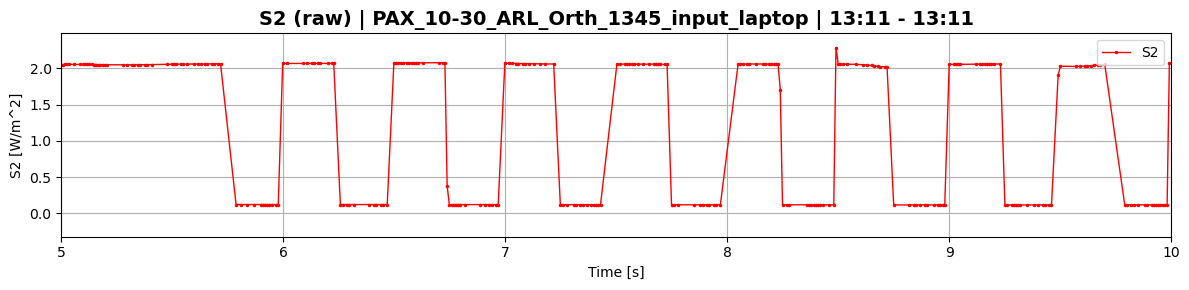

Using skip time of 8.0 seconds for output dataset
Time range: min=8.007, max=95.591
	Choosing assign_by parameter automatically; 	Using assign_by = "s3Avg" where dif = 1.30
	Dif = 1.30 for s3Avg is positive; not switching signals
	First measurement of Signal 1:  [-0.024437333333333332, -0.042478666666666665, -0.040250666666666664]
	First measurement of Signal 2:  [-0.018779999999999998, -0.045171538461538464, 0.04355384615384616]
Time range: min=0.029, max=95.591


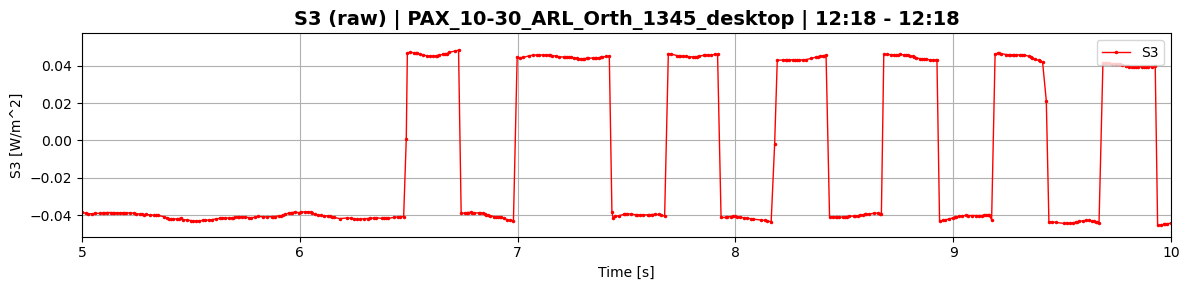

In [29]:
my_pair.match_IO_plot()

In [30]:
# For input, default is signal 2
# For output, default is signal 1
my_pair.set_signal_switch(True)   # We need to switch the signal arrays used as input

	======Begin averaging INPUT dataset...======

Time range: min=8.049, max=60.007

	======INPUT dataset averaged successfully======


	======Begin averaging OUTPUT dataset...======

Time range: min=8.007, max=95046.109
Determining change point ranges automatically...
Using change_point_range_1=(8.007, 108.007)
Using change_point_range_2=(3008.007, 3108.007)
=== performing change point detection ===
cp range: (8.007, 108.007)
using 7740 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7740,)
computing range... ---> range = (0.15,0.21)
displaying jump_fig for switch parameter = s1



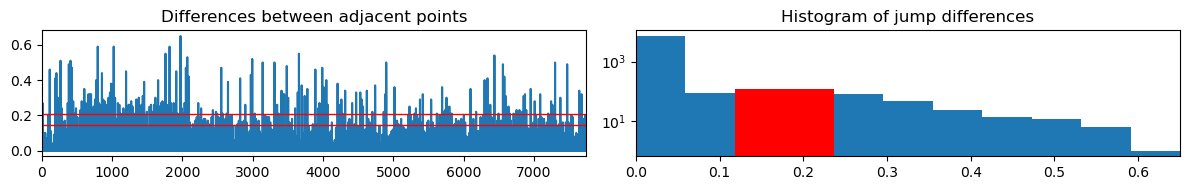



found width of 0.059 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7740,)
computing range... ---> range = (0.06,0.11)
displaying jump_fig for switch parameter = s2



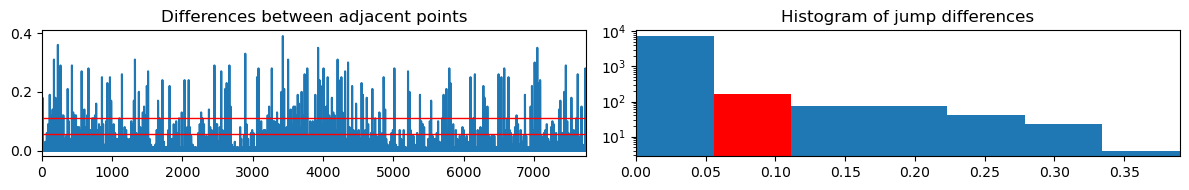



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7740,)
computing range... ---> range = (1.31,1.37)
displaying jump_fig for switch parameter = s3



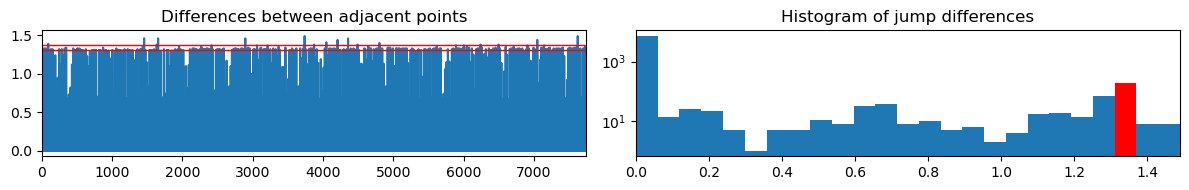



found width of 0.060 for s3
greater than prev width of 0.059 for s1
--- end of switch param: s3 ---

---> switch parameter found: s3 <---
finding differences within range = (1.31,1.37)
Jump points detected: 196
out of total: ~400.0

computing offset...


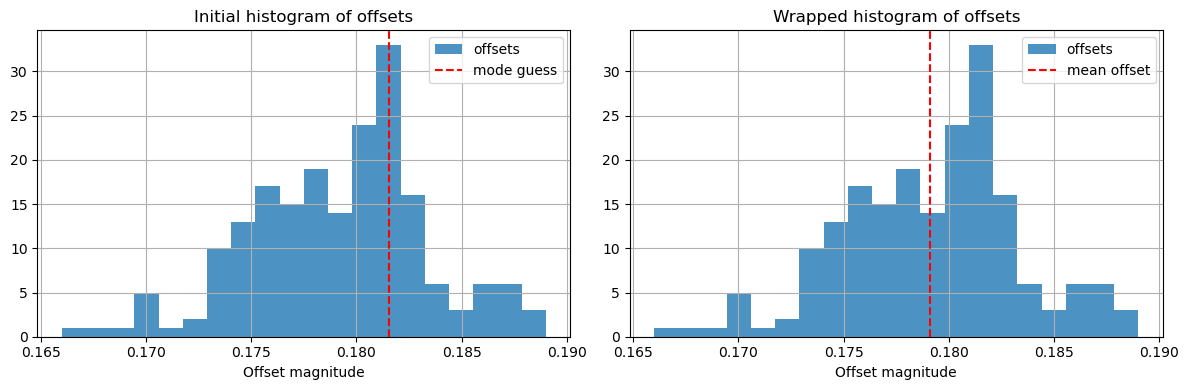



offset = 0.179 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (3008.007, 3108.007)
using 7739 data entries
skipping 232316 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7739,)
computing range... ---> range = (0.77,0.83)
displaying jump_fig for switch parameter = s1



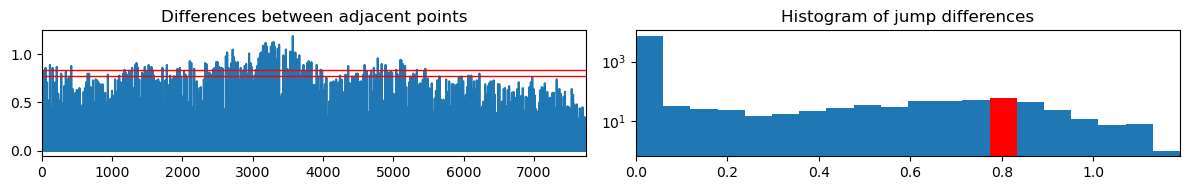



found width of 0.059 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7739,)
computing range... ---> range = (1.07,1.13)
displaying jump_fig for switch parameter = s2



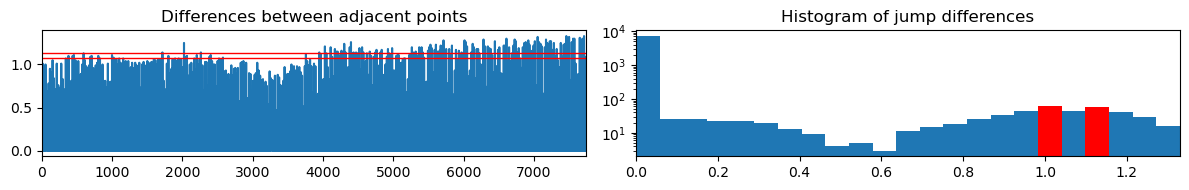



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7739,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s3



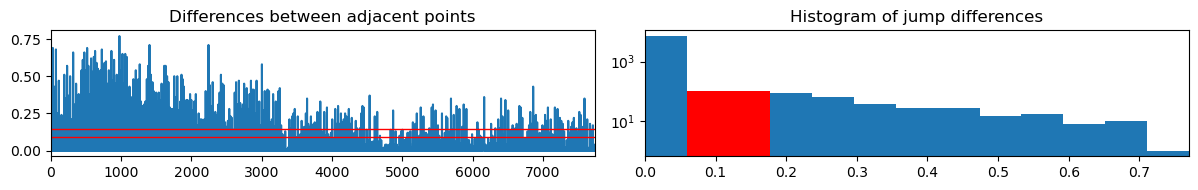



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.77,0.83)
Jump points detected: 59
out of total: ~399.9

computing offset...


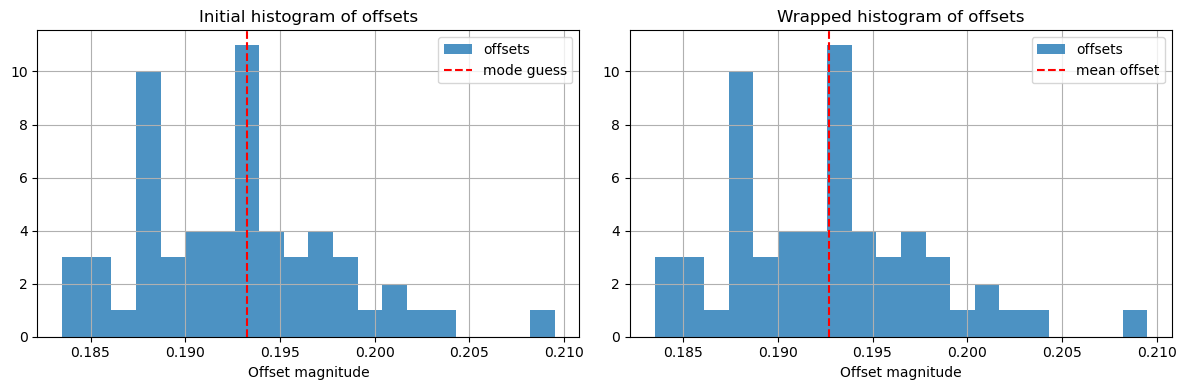



offset = 0.193 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of 0.014 seconds over 12000.0 switches
Corrected Switch Time = 0.2500011
=== starting average_data ===
averaging data... Done
Dropped 2 observations with <4 points (out of total 380148 observations)

--- interpolating data ---
length before: 190073
length after: 190075
2 total added
--- end interpolating data ---

--- interpolating data ---
length before: 190073
length after: 190074
1 total added
--- end interpolating data ---
Signal 1 size=190074	Signal 1 range: t=(8.55,95045.48)
Signal 2 size=190075	Signal 2 range: t=(8.30,95045.73)
=== end average_data ===

	======OUTPUT dataset averaged successfully======



	======Begin PTF calculations for INPUT/OUTPUT dataset pair...======



NameError: name 'self' is not defined

In [31]:
ds_ARL_1345_1030 = my_pair.get_full_ds()

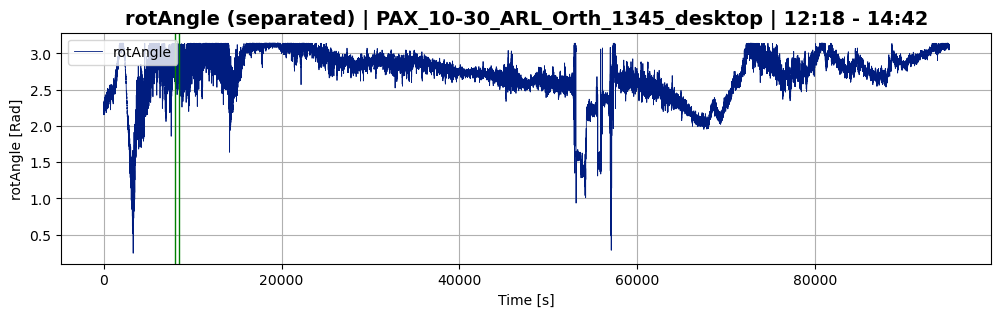

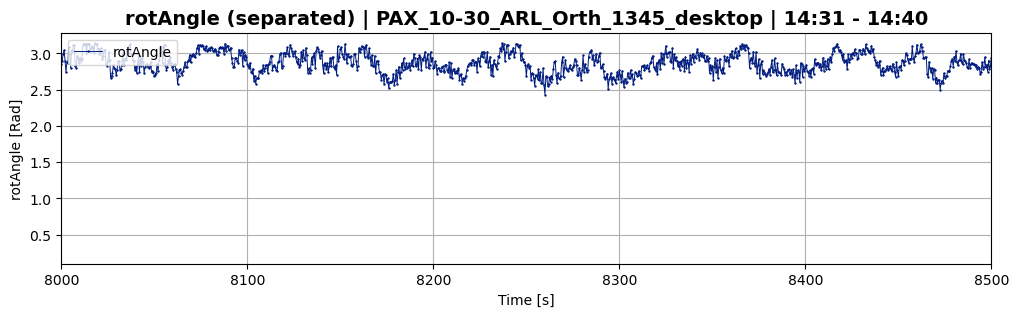

In [16]:
ds_ARL_1345_1030.plot_separated(plot_param='rotAngle',sample_range=(8000,8500))

#### Input SOPs as reference for entire dataset with IOPair: 11-15 Manual Movement Channel Comparison

1345 channel

In [50]:
plt.ioff()
plt.close('all')

In [51]:
filepath_Manual_1345='Datasets/Whole_setup/11-15/PAX_11-15_Manual_Orth_1345_desktop.csv'
filepath_Manual_1345_input='Datasets/Whole_setup/11-15/PAX_11-15_Manual_Orth_1345_input_laptop.csv'
my_pair_1345 = IOPair(filepath_Manual_1345, filepath_Manual_1345_input)

Using skip time of 8.0 seconds for input dataset
Time range: min=8.011, max=60.005
	Choosing assign_by parameter automatically; 	Using assign_by = "s2Avg" where dif = 1.09
	Dif = 1.09 for s2Avg is positive; not switching signals
	First measurement of Signal 1:  [-2.011375, -0.19012500000000002, 0.060643749999999996]
	First measurement of Signal 2:  [-0.07614, 1.9624444444444444, 0.09056666666666667]
Time range: min=0.031, max=60.005


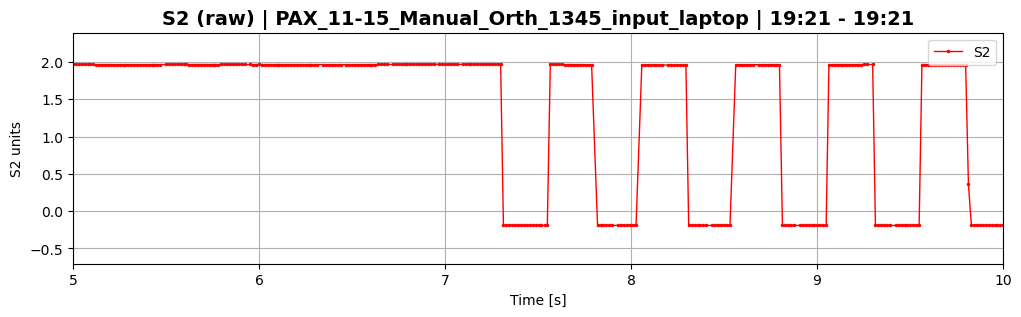

Using skip time of 12.5 seconds for output dataset
Time range: min=12.503, max=61.824
	Choosing assign_by parameter automatically; 	Using assign_by = "s2Avg" where dif = -1.01
	Dif = -1.01 for s2Avg is negative; switching signals
	First measurement of Signal 1:  [-1.273, -0.026734444444444443, -0.2779111111111111]
	First measurement of Signal 2:  [-0.055843, 1.331, 0.19792]
Time range: min=0.085, max=61.824


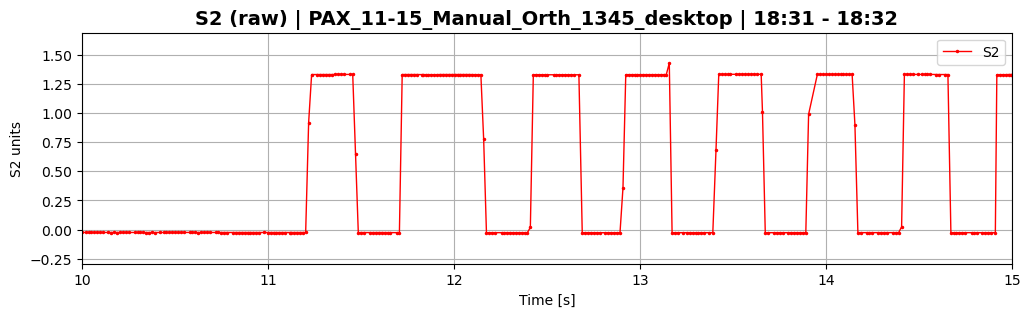

In [52]:
my_pair_1345.match_IO_plot(output_set_range=(0,0.1),output_plot_range=(10,15),output_skip_time=12.5)

In [54]:
# For input, default is signal 2
# For output, default is signal 1
my_pair_1345.set_signal_switch(True)   # We need to switch the signal arrays used as input

	Begin averaging INPUT dataset...

Time range: min=8.011, max=60.005

	INPUT dataset averaged successfully


	Begin averaging OUTPUT dataset...

Time range: min=12.503, max=603.946
Determining change point ranges automatically...
Using change_point_range_1=(12.503, 112.503)
Using change_point_range_2=(503.946, 603.946)
=== performing change point detection ===
cp range: (12.503, 112.503)
using 5760 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (5760,)
computing range... ---> range = (0.91,0.96)
displaying jump_fig for switch parameter = s1



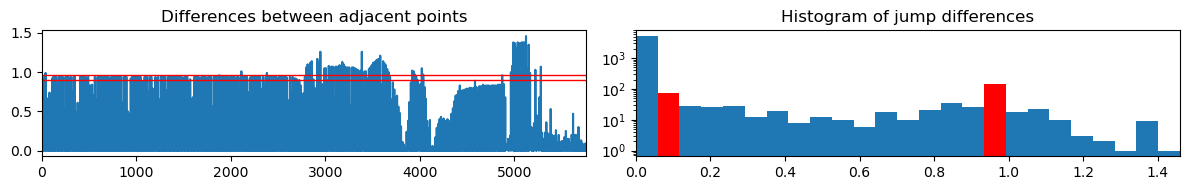



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (5760,)
computing range... ---> range = (1.00,1.06)
displaying jump_fig for switch parameter = s2



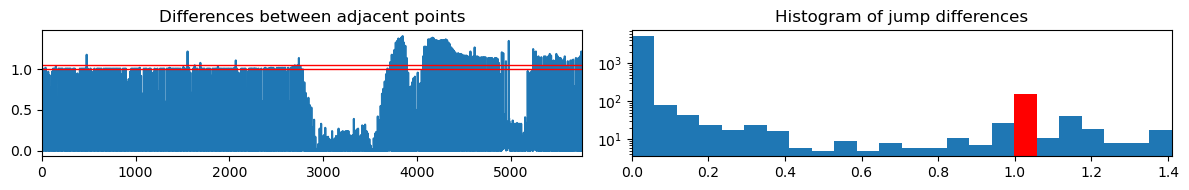



found width of 0.059 for s2
greater than prev width of 0.058 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (5760,)
computing range... ---> range = (0.29,0.35)
displaying jump_fig for switch parameter = s3



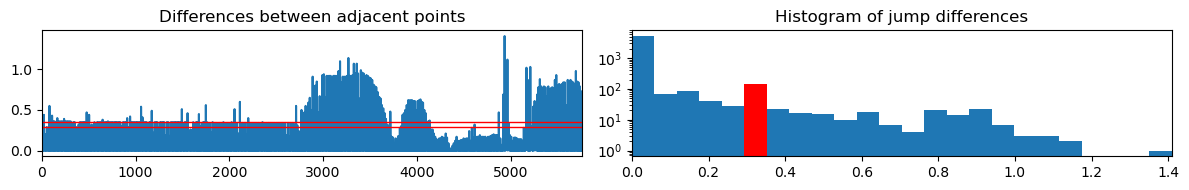



found width of 0.059 for s3
greater than prev width of 0.059 for s2
--- end of switch param: s3 ---

---> switch parameter found: s3 <---
finding differences within range = (0.29,0.35)
Jump points detected: 143
out of total: ~400.0

computing offset...


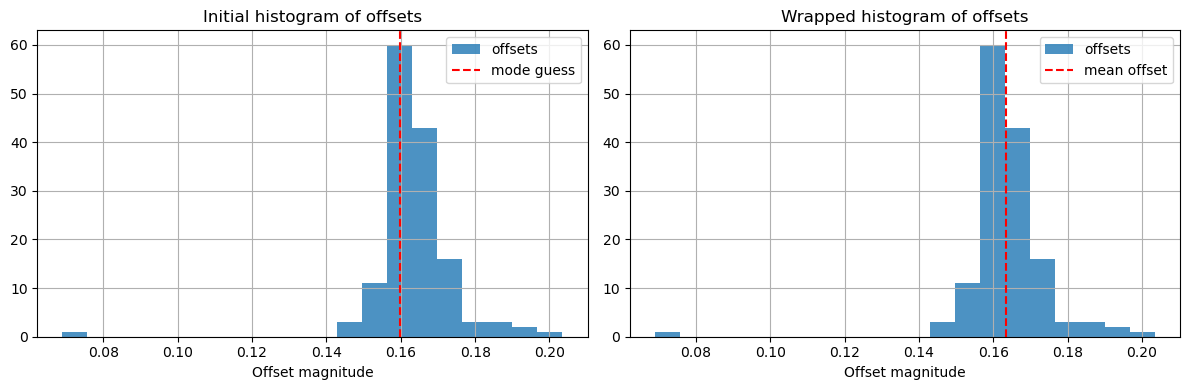



offset = 0.163 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (503.946, 603.946)
using 5830 data entries
skipping 28528 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (5830,)
computing range... ---> range = (0.06,0.12)
displaying jump_fig for switch parameter = s1



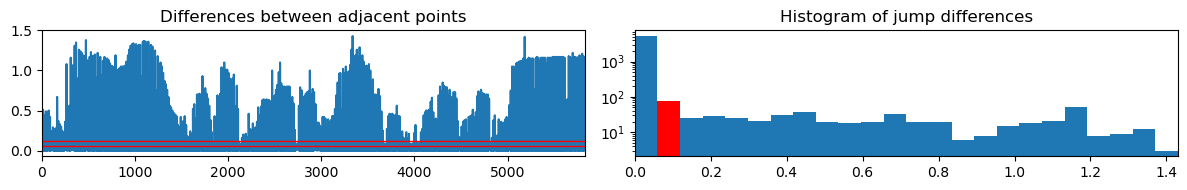



found width of 0.060 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (5830,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s2



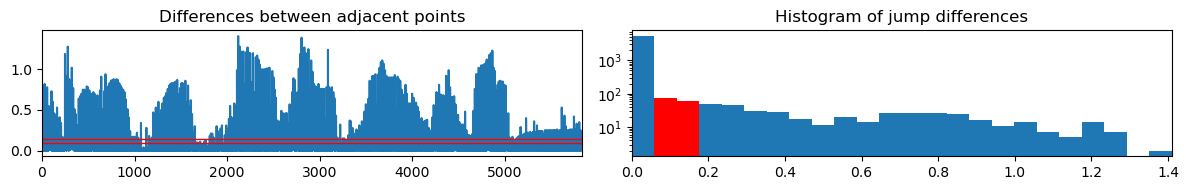



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (5830,)
computing range... ---> range = (0.67,0.73)
displaying jump_fig for switch parameter = s3



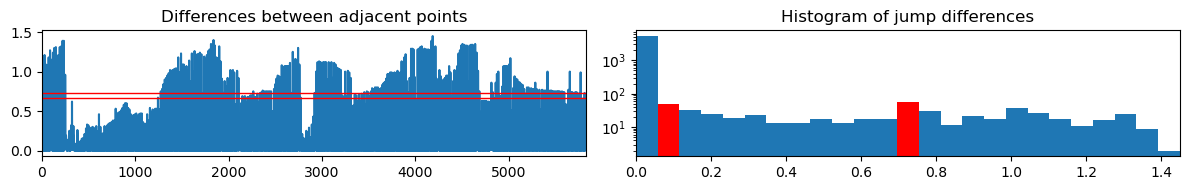



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.06,0.12)
Jump points detected: 74
out of total: ~400.0

computing offset...


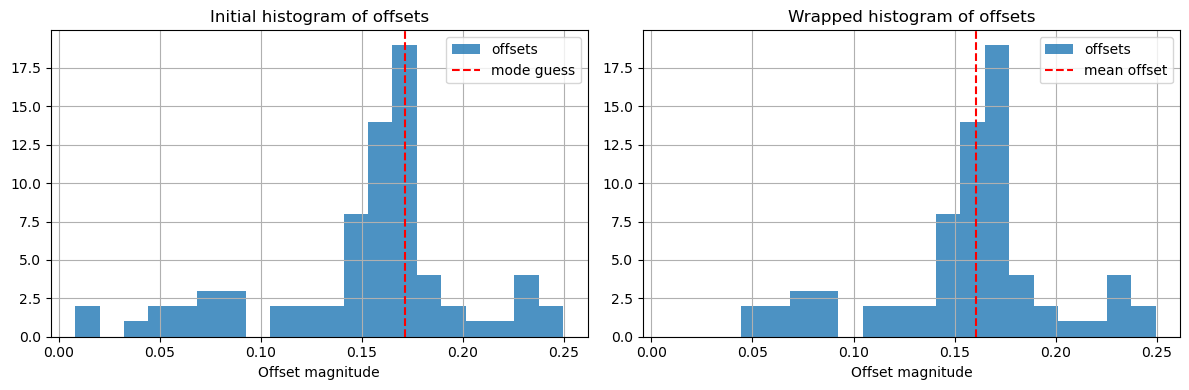



offset = 0.161 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.003 seconds over 1965.7720000000002 switches
Corrected Switch Time = 0.2499987
=== starting average_data ===
averaging data... Done
Dropped 10 observations with <4 points (out of total 2362 observations)

--- interpolating data ---
length before: 1174
length after: 1182
8 total added
--- end interpolating data ---

--- interpolating data ---
length before: 1178
length after: 1182
4 total added
--- end interpolating data ---
Signal 1 size=1182	Signal 1 range: t=(12.79,603.29)
Signal 2 size=1182	Signal 2 range: t=(13.04,603.54)
=== end average_data ===

	OUTPUT dataset averaged successfully



	Begin PTF calculations for INPUT/OUTPUT dataset pair...


	PTF calculations for INPUT/OUTPUT dataset pair performed successfully!!


In [55]:
ds_Manual_1345 = my_pair_1345.get_full_ds()

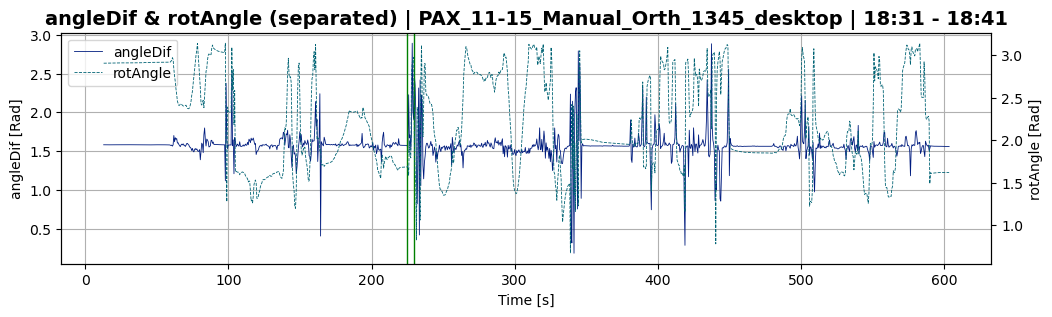

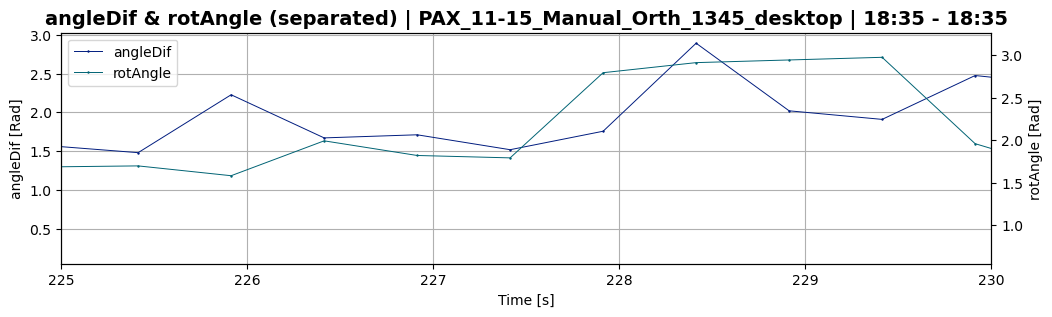

In [58]:
ds_Manual_1345.plot_separated(plot_param='angleDif',plot_param_2='rotAngle',sample_range=(225,230))

1560 channel

In [64]:
plt.ioff()
plt.close('all')

In [60]:
filepath_Manual_1560='Datasets/Whole_setup/11-15/PAX_11-15_Manual_Orth_1560_laptop.csv'
filepath_Manual_1560_input='Datasets/Whole_setup/11-15/PAX_11-15_Manual_Orth_1560_input_laptop.csv'
my_pair_1560 = IOPair(filepath_Manual_1560, filepath_Manual_1560_input)

Using skip time of 8.0 seconds for input dataset
Time range: min=8.013, max=59.996
	Choosing assign_by parameter automatically; 	Using assign_by = "s1Avg" where dif = 1.01
	Dif = 1.01 for s1Avg is positive; not switching signals
	First measurement of Signal 1:  [-2.271333333333333, 0.024167777777777778, -0.12487777777777777]
	First measurement of Signal 2:  [0.0270025, 2.2824999999999998, 0.2133625]
Time range: min=0.04, max=59.996


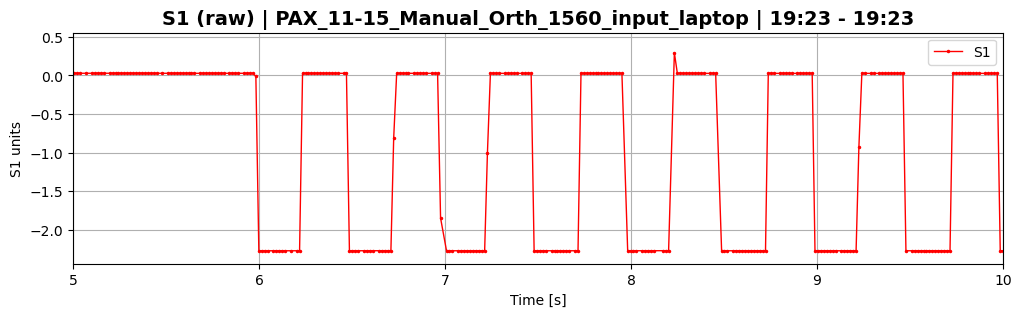

Using skip time of 12.0 seconds for output dataset
Time range: min=12.0, max=61.834
	Choosing assign_by parameter automatically; 	Using assign_by = "s1Avg" where dif = -1.17
	Dif = -1.17 for s1Avg is negative; switching signals
	First measurement of Signal 1:  [-1.548, -0.5236571428571428, -0.2937571428571429]
	First measurement of Signal 2:  [0.3828, -0.3125142857142857, -1.543]
Time range: min=0.048, max=61.834


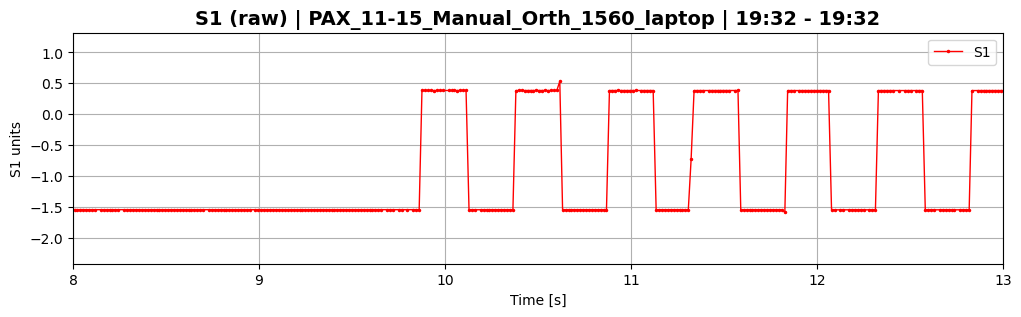

In [65]:
my_pair_1560.match_IO_plot(output_set_range=(0,0.1),output_plot_range=(8,13),output_skip_time=12)

In [66]:
# For input, default is signal 2
# For output, default is signal 1
my_pair_1560.set_signal_switch(True)   # We need to switch the signal arrays used as input

	======Begin averaging INPUT dataset...======

Time range: min=8.013, max=59.996

	======INPUT dataset averaged successfully======


	======Begin averaging OUTPUT dataset...======

Time range: min=12.0, max=603.831
Determining change point ranges automatically...
Using change_point_range_1=(12.0, 112.0)
Using change_point_range_2=(503.831, 603.831)
=== performing change point detection ===
cp range: (12.0, 112.0)
using 5772 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (5772,)
computing range... ---> range = (1.11,1.17)
displaying jump_fig for switch parameter = s1



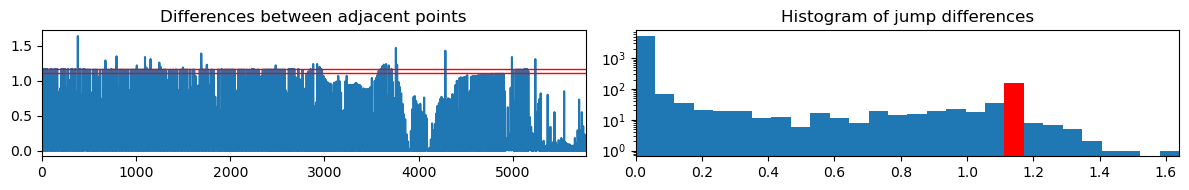



found width of 0.059 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (5772,)
computing range... ---> range = (0.06,0.12)
displaying jump_fig for switch parameter = s2



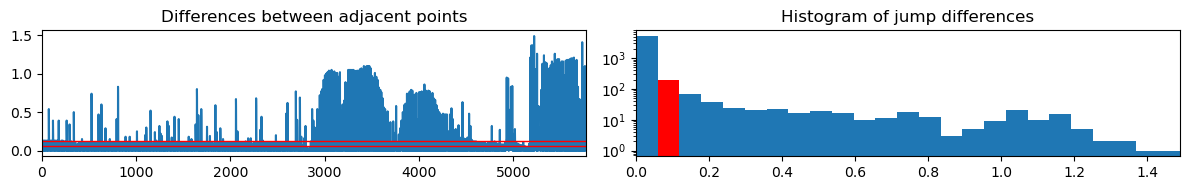



found width of 0.060 for s2
greater than prev width of 0.059 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (5772,)
computing range... ---> range = (0.72,0.78)
displaying jump_fig for switch parameter = s3



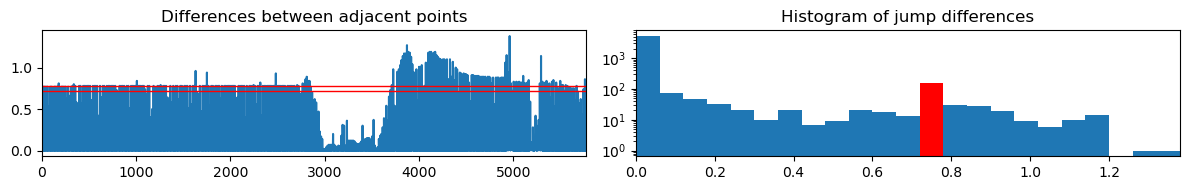



found width of 0.060 for s3
greater than prev width of 0.060 for s2
--- end of switch param: s3 ---

---> switch parameter found: s3 <---
finding differences within range = (0.72,0.78)
Jump points detected: 157
out of total: ~400.0

computing offset...


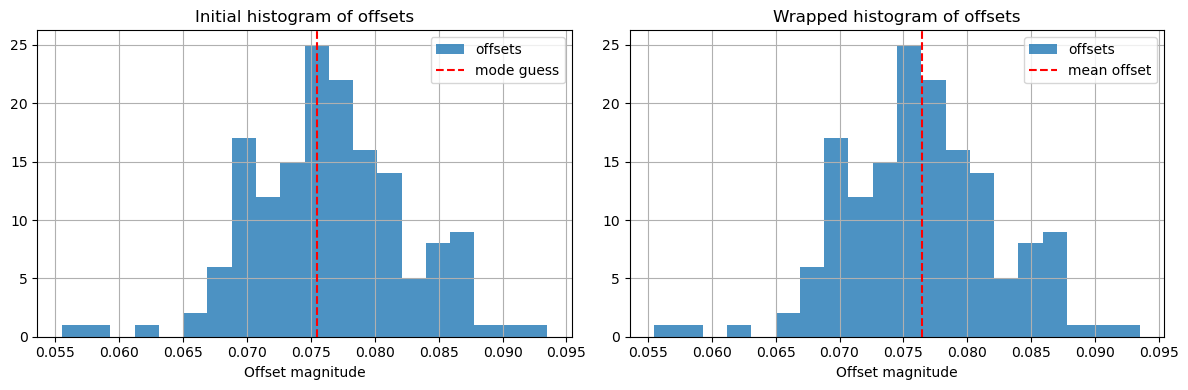



offset = 0.076 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (503.831, 603.831)
using 5839 data entries
skipping 29409 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (5839,)
computing range... ---> range = (0.06,0.12)
displaying jump_fig for switch parameter = s1



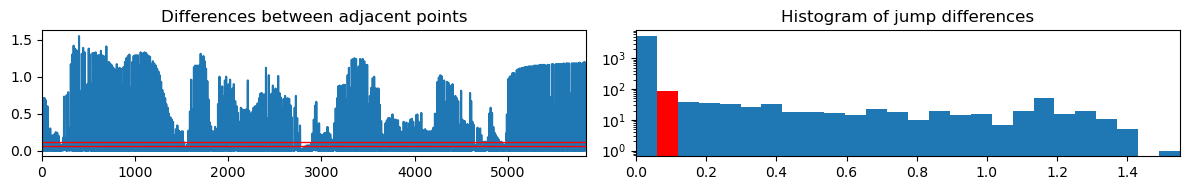



found width of 0.060 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (5839,)
computing range... ---> range = (0.47,0.53)
displaying jump_fig for switch parameter = s2



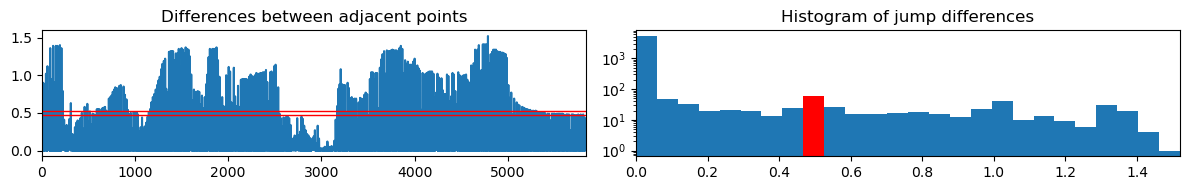



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (5839,)
computing range... ---> range = (0.06,0.12)
displaying jump_fig for switch parameter = s3



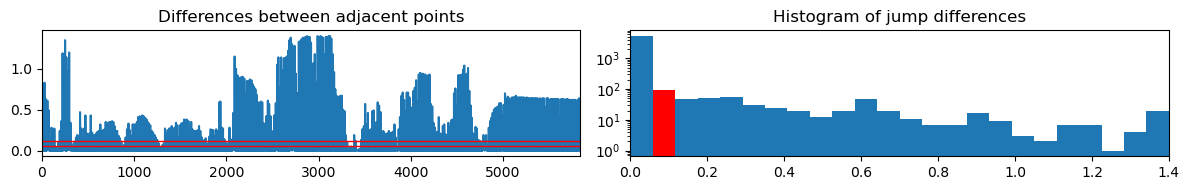



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.06,0.12)
Jump points detected: 87
out of total: ~400.0

computing offset...


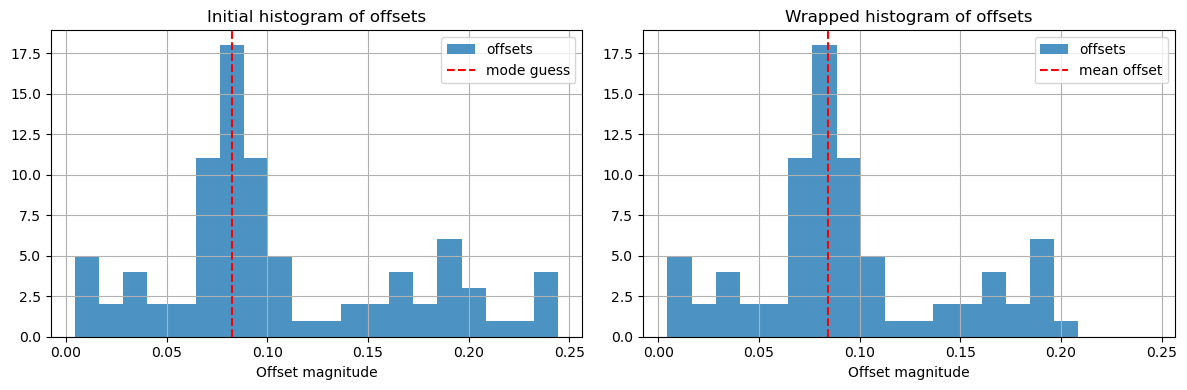



offset = 0.084 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of 0.008 seconds over 1967.324 switches
Corrected Switch Time = 0.2500041
=== starting average_data ===
averaging data... Done
Dropped 3 observations with <4 points (out of total 2363 observations)

--- interpolating data ---
length before: 1180
length after: 1183
3 total added
--- end interpolating data ---

--- interpolating data ---
length before: 1180
length after: 1183
3 total added
--- end interpolating data ---
Signal 1 size=1183	Signal 1 range: t=(12.20,603.21)
Signal 2 size=1183	Signal 2 range: t=(12.45,603.46)
=== end average_data ===

	======OUTPUT dataset averaged successfully======



	======Begin PTF calculations for INPUT/OUTPUT dataset pair...======


	======PTF calculations for INPUT/OUTPUT dataset pair performed successfully!!======


In [67]:
ds_Manual_1560 = my_pair_1560.get_full_ds()

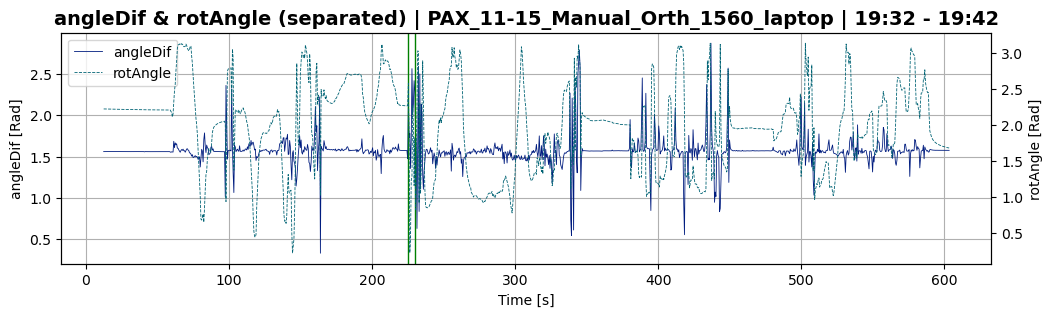

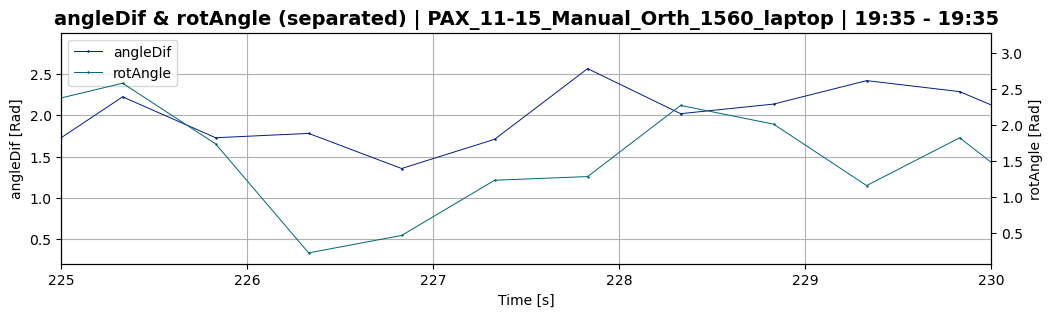

In [68]:
ds_Manual_1560.plot_separated(plot_param='angleDif',plot_param_2='rotAngle',sample_range=(225,230))